In [74]:
import pandas as pd
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/thearda-General-Social-Survey-2010/SPSS/")
os.listdir(os.getcwd())
df = pd.read_csv("output_file.csv",  encoding = 'unicode_escape', engine ='python')
df_names = pd.read_csv("output_file_w_col_names.csv",  encoding = 'unicode_escape', engine ='python')
# df_names

YEAR: GSS year for this respondent  ID: Respondent's ID number  \
0                                 2010.0                         1.0   
1                                 2010.0                         2.0   
2                                 2010.0                         3.0   
3                                 2010.0                         4.0   
4                                 2010.0                         5.0   
...                                  ...                         ...   
4896                              2010.0                      9577.0   
4897                              2010.0                      9578.0   
4898                              2010.0                      9579.0   
4899                              2010.0                      9580.0   
4900                              2010.0                      9581.0   

     WRKSTAT: Last week were you working full-time, part-time, going to school, keeping house, or what?  \
0                                     Working full-time                                                   
1                                     Working full-time                                                   
2                                               Retired                                                   
3                                               Retired                                                   
4                                               Retired                                                   
...                                                 ...                                                   
4896                                  Working full-time                                                   
4897                                            Retired                                                   
4898  With a job, but not at work because of tempora...                                                   
4899                                  Working full-time                                                   
4900                                            Retired                                                   

     HRS1: If working, full- or part-time, how many hours did you work last week, at all jobs?  \
0                                                    55                                          
1                                                    45                                          
2                                          Inapplicable                                          
3                                          Inapplicable                                          
4                                          Inapplicable                                          
...                                                 ...                                          
4896                                                 40                                          
4897                                       Inapplicable                                          
4898                                                  9                                          
4899                                                 40                                          
4900                                       Inapplicable                                          

     HRS2: If with a job, but not at work: How many hours a week do you usually work, at all jobs?  \
0                                          Inapplicable                                              
1                                          Inapplicable                                              
2                                          Inapplicable                                              
3                                          Inapplicable                                              
4                                          Inapplicable                                              
...                                                 ...            

## General notes

"Since 1972, the General Social Survey (GSS) has monitored societal change and studied the growing complexity of American society."
- Started in Iniversity of Chicago
- The GSS gathers data on contemporary American society
- Funded by National Science Foundation
- Possbile Respondants: All noninstitutionalized, English and Spanish speaking persons 18 years of age or older, living in the United States

Methods of data collection: 

-  the U.S. version of these questions is incorporated into the cross-sectional GSS studies.
- Before 2020, surveys were conducted face to face (like this one)
- "basic scientific research on the structure and development of American society with a data-collection program designed to both monitor societal change within the United States and to compare the United States to other nations"


### My own notes

Since these interviews are largely done in person, it matters who can attend the interview, and where GSS sources people from 
(This site)[https://ssric.org/trd/other/ssda/gssdesc] states that the "GSS tries to follow the highest survey standards"

[Wikipedia](https://en.wikipedia.org/wiki/General_Social_Survey) states "The GSS sample is drawn using an area probability design that randomly selects respondents in households across the United States to take part in the survey. Respondents that become part of the GSS sample are from a mix of urban, suburban, and rural geographic areas. Participation in the study is strictly voluntary"

The inportant part here is that its completely volentary. Those which are may be busy, or unwilling to participate which might have a different spread won't be represented

NUKEELEC: Which statement best describes your own view about increasing the use of nuclear power to generate electricity in the U.S.?

In [47]:
for col in df_names.columns:
    if col.__contains__("nuclear"):
        print(col)

POLNUKE: Elected officials (How well elected officials know risk by nuclear power?)
BIZNUKE: Business leaders (How well business leaders know risk by nuclear power?)
ENGNUKE: Nuclear engineers (How well nuclear engineers know risk by nuclear power?)
ENGAGRNK: Please look at Card E14. (On a scale of 1 to 5, where 1 means 'Near complete agreement' and 5 means 'No agreement at all') to what extent do nuclear engineers agree on the risks and benefits of nuclear power to generate electricity?
ENHINFNK: Some say that the government should expand the use of nuclear power to generate electricity in the U.S. Others oppose any expansion in the use of nuclear power in this country. Please look at Card E15. How much influence should each of the following groups
POLINFNK: (Please look at Card E15. How much influence should each of the following groups have in deciding whether to expand the use of nuclear power? Elected officials. (Would you say . . .)
BIZINFNK: (Please look at Card E15. How much in

In [48]:
for col in df_names.columns:
    if col.__contains__("climate"):
        print(col)

TEMPGEN1: In general, do you think that a rise in the world's temperature caused by climate change is extremely dangerous for the environment, very dangerous, somewhat dangerous, not very dangerous, or not dangerous at all for the environment?


In [49]:
nuke_str = "NUKEELEC"
for col in df.columns:
    #print(df['NUKEELEC'])
    pass

In [50]:
# drop all Inapplicable
df_clean_nuke = df.copy()
df_clean_nuke = df_clean_nuke[df_clean_nuke.NUKEELEC != 'Inapplicable']
df_clean_nuke_1 = df_clean_nuke[df_clean_nuke.TEMPGEN1 != 'Inapplicable']

def mean_df_gen(col_name, df=df_clean_nuke):
    #Mean of groups
    temp_df = df[[col_name, "NUKEELEC"]].copy()
    temp_df['NUKEELEC'] = temp_df['NUKEELEC'].map({"Strongly oppose": 1, "Somewhat oppose": 2, "No answer": 3, "Somewhat favor": 4, "Strongly favor": 5})
    mean_df = temp_df.groupby([col_name])['NUKEELEC'].mean().reset_index().copy()
    return mean_df

In [51]:
# Drop all "No answers" and "Don't Knows" in NUKELEC
def drop_vals(df):
    df.drop(df[df.NUKEELEC.str.contains("Don't know")].index, inplace=True)
    df.drop(df[df.NUKEELEC.str.contains("No answer")].index, inplace=True)
drop_vals(df_clean_nuke)

def drop_cust_vals(df, col, cust_val = None):
    df2 = df.copy()
    if cust_val is not None:
        df2.drop(df2[df2[col].str.contains(cust_val, na=False)].index, inplace=True)
    df2.drop(df2[df2[col].str.contains("Don't know", na=False)].index, inplace=True)
    df2.drop(df2[df2[col].str.contains("No answer", na=False)].index, inplace=True)
    return df2


In [52]:
df_clean_nuke["NUKEELEC"].value_counts()

Favor              441
Oppose             196
Strongly favor     141
Strongly oppose     87
Name: NUKEELEC, dtype: int64

In [53]:
df_clean_nuke.shape[0]

865

In [54]:
import pyreadstat
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/thearda-General-Social-Survey-2010/SPSS/")
df_sav, meta = pyreadstat.read_sav("General Social Survey 2010 Cross-Section and Panel Combined.SAV", user_missing=True, apply_value_formats=True)
df_sav['TEMPGEN1']

0                                    Don't know
1       Extremely dangerous for the environment
2                                    Don't know
3                                Very dangerous
4                                  Inapplicable
                         ...                   
4896                                        NaN
4897                                        NaN
4898                                        NaN
4899                                        NaN
4900                                        NaN
Name: TEMPGEN1, Length: 4901, dtype: category
Categories (8, object): ['Don't know', 'Extremely dangerous for the environment', 'Inapplicable', 'No answer', 'Not dangerous at all for the environment', 'Not very dangerous', 'Somewhat dangerous', 'Very dangerous']

In [70]:
from collections import OrderedDict
from plotly.colors import n_colors
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

fav_list = ["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
# fav_list2 = ["Strongly oppose", "Oppose", "Don't know/No answer", "Favor", "Strongly favor"] # Is not to be used anymore
# fav_list3 = ["Strongly oppose", "Oppose","Don't know", "No answer", "Favor", "Strongly favor"] # Is not to be used anymore

def calc_percentage(val, total):
    return ((val/total)*100)

def create_table(df, compare_col, val_order, y_axis_title = None, height=500):
    
    cust_fav_list = ["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
    
    if y_axis_title is None:
        y_axis_title = compare_col
    category_list = val_order
    results = OrderedDict()
    table_list = [category_list]
    
    
    colors = n_colors('rgb(255, 200, 200)', 'rgb(200, 0, 0)', 9, colortype='rgb')
    
    for i in cust_fav_list:
        temp_list = []
        # print(i)
        for y in category_list:
            df_tmp = df.copy()
            # drop NaN values
            df_tmp.dropna(subset=["NUKEELEC"], inplace = True)
            df_tmp.dropna(subset=[compare_col], inplace = True)
            
            rslt_df = df_tmp.loc[(df_tmp['NUKEELEC'] == i) & (df_tmp[compare_col] == y)]
            results[i, y] = (rslt_df.shape[0] / df.shape[0]) * 100
            
            
            # print("    ", y, f"\n\t\trslt_df: {rslt_df.shape[0]}, df.shape[0]: {df.shape[0]}, {results[i, y]}%")
            
            temp_list.append(f"{round(((rslt_df.shape[0] / df.shape[0]) * 100), 2)}%")
            pass
        table_list.append(temp_list.copy())
        
    total = 0
    for i in results.values():
        total += i
    # print("total =", total)
    # print(results)
    
    cust_fav_list_formated = []
    for i in cust_fav_list:
        if i != "No answer" and i != "Don't know":
            cust_fav_list_formated.append(i + " nuclear energy")
        else:
            cust_fav_list_formated.append(i)
    # print(cust_fav_list)
        
    combined_list = [y_axis_title] + cust_fav_list_formated
    fig = go.Figure(data=[go.Table(header=dict(values = combined_list),
                 cells=dict(values=table_list,
                            # I would prefer to add color ala a heatmap, but it does not appear to be possible in plotly currently
                           # fill_color=['rgb(245, 245, 245)', colors],
                           )
                            )])
    fig.update_layout(title_text=f"American Attitudes towards nuclear energy VS {y_axis_title}<br><sub>source: David Smith", height=height)
    fig.show()
# create_table(df_clean_nuke, "PARTYID", party_list, "Political leaning")
# create_table(df_temp2, "RACECEN1", ["Black", "White", "Other"], "Respondent's race")
# create_table(df_temp2, "RACECEN1", ["Black", "White", "Other"], "Respondent's race", ["Strongly oppose", "Oppose", "Favor", "Strongly favor"])

In [71]:
# Don't as kme how this works. I really do not know
# Colors cannot be changed
# This post should work but it doesn't: https://stackoverflow.com/questions/65843823/color-discrete-sequence-in-a-plotly-graph-objects
import plotly.io as pio

# naming a layout theme for future reference
pio.templates["google"] = go.layout.Template(
    layout_colorway=px.colors.qualitative.Alphabet
)

# setting Google color palette as default
# pio.templates.default = "google"

def percentage_bar(df, compare_col, val_order, y_axis_title = None, height = 350, cust_colors = False):
        
    if cust_colors:
        pio.templates.default = "google"
    else:
        pio.templates.default = 'plotly'
    
    cust_fav_list = ["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
    
    if y_axis_title is None:
        y_axis_title = compare_col
    category_list = val_order
    results = OrderedDict()
    table_list = []
    
    
    for i in category_list:
        temp_list = []
        # print(i)
        for y in cust_fav_list:
            df_tmp = df.copy()
            # drop NaN values
            df_tmp.dropna(subset=["NUKEELEC"], inplace = True)
            df_tmp.dropna(subset=[compare_col], inplace = True)
            
            rslt_df = df_tmp.loc[(df_tmp['NUKEELEC'] == y) & (df_tmp[compare_col] == i)]
            fav_total = df_tmp.loc[(df_tmp['NUKEELEC'] == y)].shape[0]
            
            #fav_total = df_tmp.loc[~(df_tmp['NUKEELEC'] == y) & ~(df_tmp[compare_col].isin(category_list))].shape[0]
            
            # print(df_tmp.loc[(df_tmp[compare_col] == i)]['NUKEELEC'].value_counts())
            # print(df_tmp['NUKEELEC'].value_counts())
            # print(df_tmp.loc[(df_tmp[compare_col] == i)][compare_col])
            # print(y, i, rslt_df.shape[0], fav_total )
            # print(df_tmp[compare_col].value_counts())
            # print(df_tmp['NUKEELEC'].value_counts())
            
            try:
                results[i, y] = (rslt_df.shape[0] / fav_total) * 100
            except ZeroDivisionError:
                results[i, y] = 0
                
            # print("    ", y, f"\n\t\trslt_df: {rslt_df.shape[0]}, fav_total: {fav_total}, {results[i, y]}%")
            
            try:
                temp_list.append(round(((rslt_df.shape[0] / fav_total) * 100), 2))
            except ZeroDivisionError:
                temp_list.append(0)
            pass
        table_list.append(temp_list.copy())

    
    cust_fav_list_formated = []
    for i in cust_fav_list:
        if i != "No answer" and i != "Don't know":
            cust_fav_list_formated.append(i + " nuclear energy")
        else:
            cust_fav_list_formated.append(i)

    go_bars = []
    for idx, i in enumerate(val_order):
        go_bars.append(go.Bar(name=i, x=cust_fav_list, y=table_list[idx], text=table_list[idx],
            textposition='auto',))
    # print(go_bars)
    fig = go.Figure(data=go_bars)
    colors = px.colors.sequential.RdBu
    # fig.update_traces(marker=dict(color=px.colors.qualitative.Light24))
    
    # # Change the bar mode
    fig.update_layout(barmode='stack', yaxis_title="Percentage", xaxis_title=f"Attitude towards nuclear energy", legend_title=y_axis_title,
                      title_text=f"American Attitudes towards nuclear energy VS {y_axis_title}<br><sub>source: David Smith", height=height)
    fig.show()
    pio.templates.default = 'plotly'
# percentage_bar(df_clean_nuke, "PARTYID", party_list, "Respondent's Political affiliation", height=600)
# percentage_bar(cc_df, "TEMPGEN1", danger_list, "Nuclear energy?", ["Strongly oppose", "Oppose","Don't know", "Favor", "Strongly favor"])
# percentage_bar(df_clean_nuke, "POLVIEWS", pol_list2, "Respondent's political leaning", height=600)

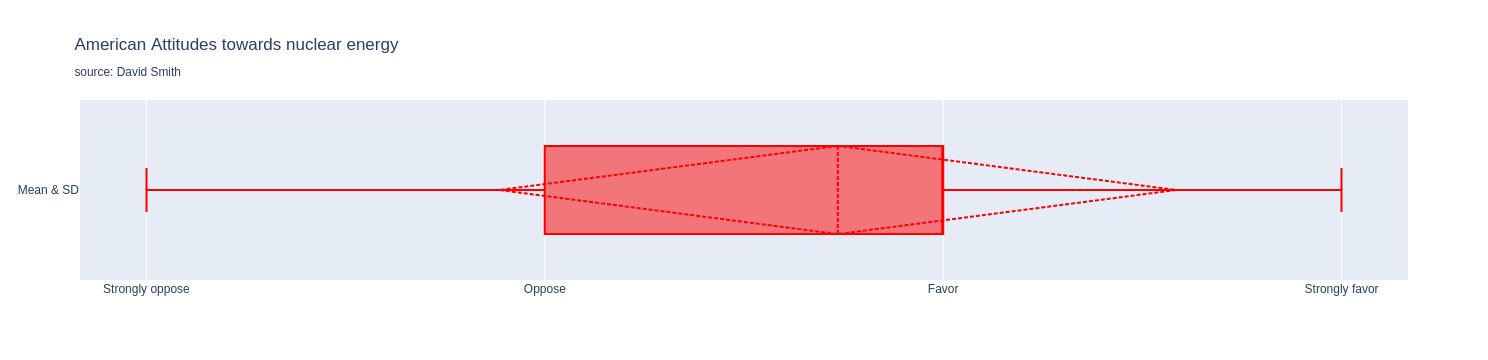

favor:  0.6728323699421965
oppose:  0.32716763005780347


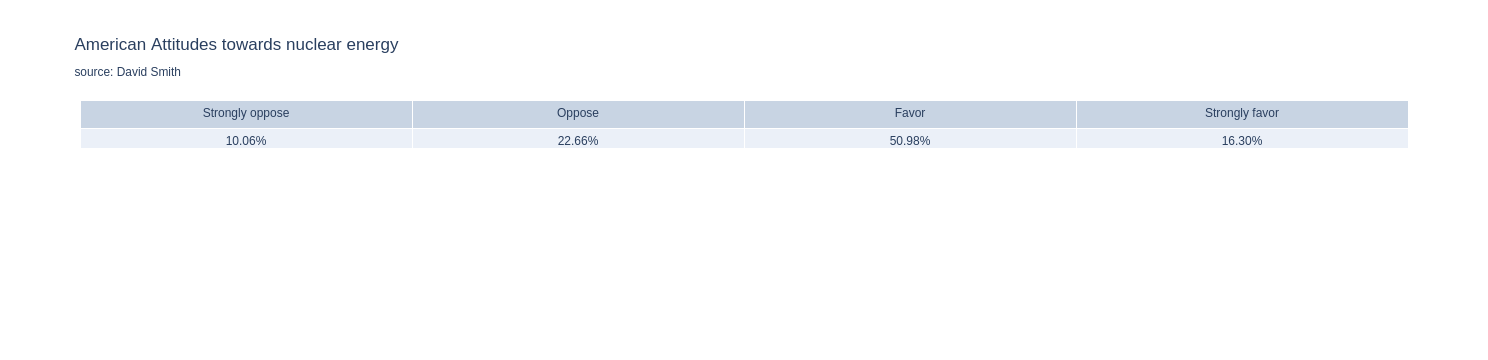

In [96]:

# df_gss_temp['NUKEELEC'] = df_gss_temp['NUKEELEC'].map({"Strongly oppose":"Strongly oppose", "Oppose":"Oppose", "Don't know":"Don't know/No answer", "Favor":"Favor", 
                                                       # "Strongly favor":"Strongly favor", "No answer": "Don't know/No answer"})

#NUKEELEC: Which statement best describes your own view about increasing the use of nuclear power to generate electricity in the U.S.?
fig = go.Figure()
fig.add_trace(go.Box(
    x=df_clean_nuke["NUKEELEC"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_xaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(title_text="American Attitudes towards nuclear energy<br><sub>source: David Smith")
fig.show()

sers = df_clean_nuke['NUKEELEC'].value_counts()
fav = sers['Favor'] + sers['Strongly favor']
opp = sers['Oppose'] + sers['Strongly oppose']
total = opp + fav
print("favor: ", fav / (fav + opp))
print("oppose: ", opp / (fav + opp))
sers

fig = go.Figure(data=[go.Table(header=dict(values=['Strongly oppose', 'Oppose', 'Favor', 'Strongly favor']),
                 cells=dict(values=[[f"{(sers['Strongly oppose']/total)*100:.2f}%"],
                                    [f"{(sers['Oppose']/total)*100:.2f}%"], 
                                    [f"{(sers['Favor']/total)*100:.2f}%"],
                                    [f"{(sers['Strongly favor']/total)*100:.2f}%"]]
                           ))
                     ])
fig.update_layout(title_text="American Attitudes towards nuclear energy<br><sub>source: David Smith")
fig.show()

In [58]:
# df_gss_temp['NUKEELEC'].value_counts()
df_clean_nuke["NUKEELEC"].value_counts()

Favor              441
Oppose             196
Strongly favor     141
Strongly oppose     87
Name: NUKEELEC, dtype: int64

Independent    344
Democrat       293
Republican     197
Name: PARTYID, dtype: int64


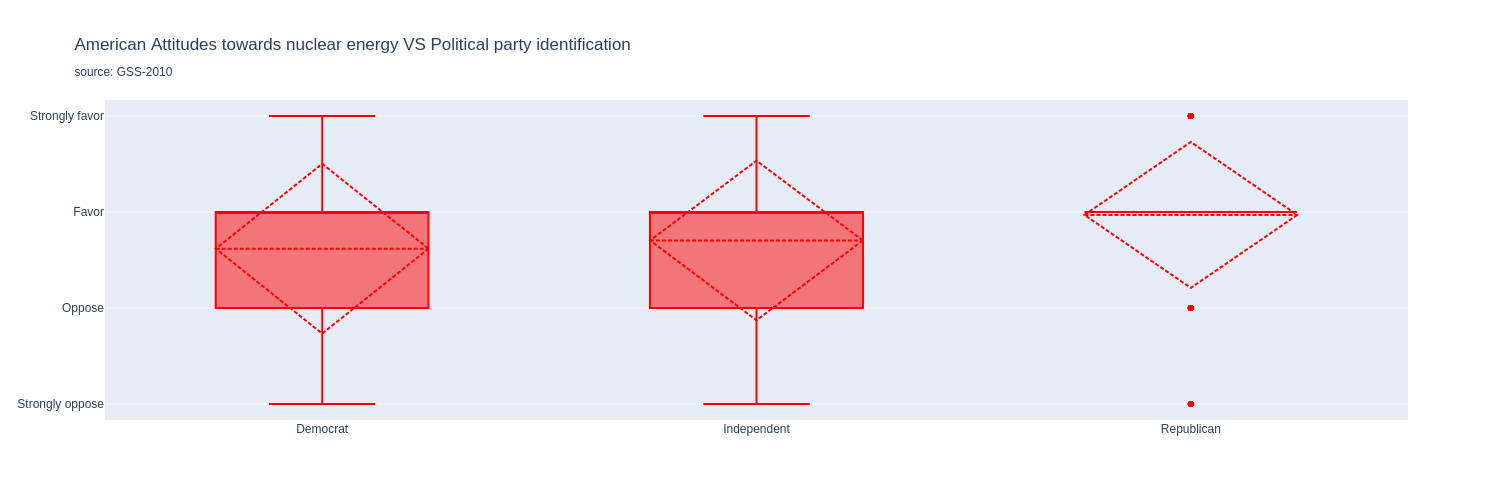

Independent    344
Democrat       293
Republican     197
Name: PARTYID, dtype: int64


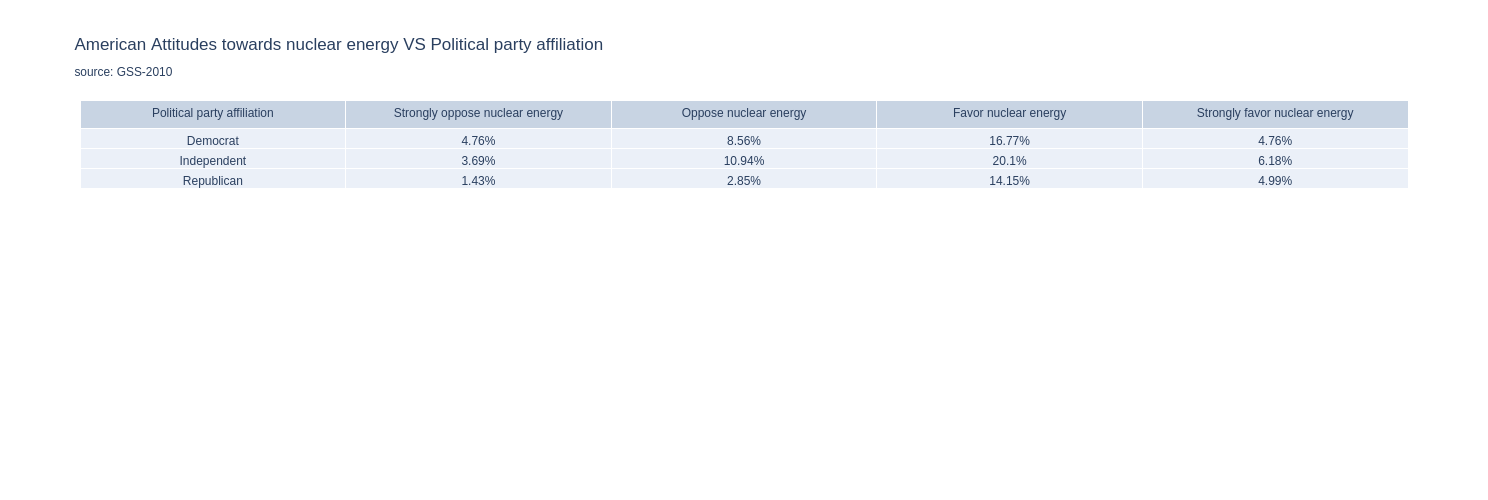

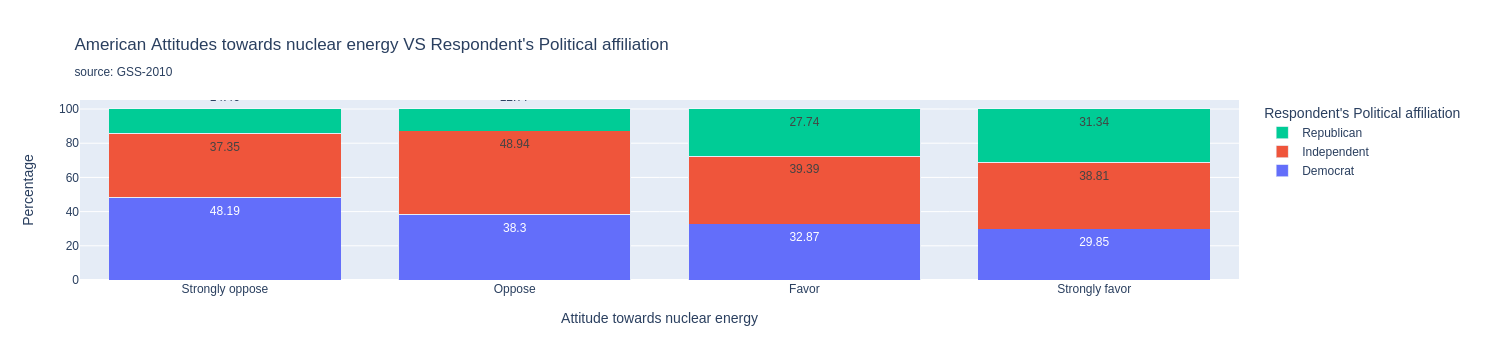

In [59]:
party_list = [ "Strong Democrat", "Not strong Democrat", "Independent, near Democrat", "Independent", "Other party", "Independent, near Republican", "Not strong Republican", "Strong Republican"]
party_list2= [ "Democrat", "Independent","Republican"]

temp_df = df_clean_nuke.copy()
temp_df['PARTYID'] = temp_df['PARTYID'].map({"Strong Democrat": "Democrat",
                                               "Not strong Democrat": "Democrat",
                                               "Independent, near Democrat": "Independent",
                                               "Independent": "Independent",
                                               "Other party": "No answer",
                                               "Independent, near Republican": "Independent",
                                               "Not strong Republican": "Republican",
                                               "Strong Republican": "Republican"})
#drop No answer
temp_df = drop_cust_vals(temp_df, "PARTYID")
print(temp_df["PARTYID"].value_counts())

fig = go.Figure()
fig.add_trace(go.Box(
    y=temp_df["NUKEELEC"],
    x=temp_df["PARTYID"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(categoryorder='array', categoryarray=party_list2)
fig.update_layout(height=500, title_text="American Attitudes towards nuclear energy VS Political party identification<br><sub>source: David Smith")
fig.show()
print(temp_df["PARTYID"].value_counts())
create_table(temp_df, "PARTYID", party_list2, "Political party affiliation")

percentage_bar(temp_df, "PARTYID", party_list2, "Respondent's Political affiliation")

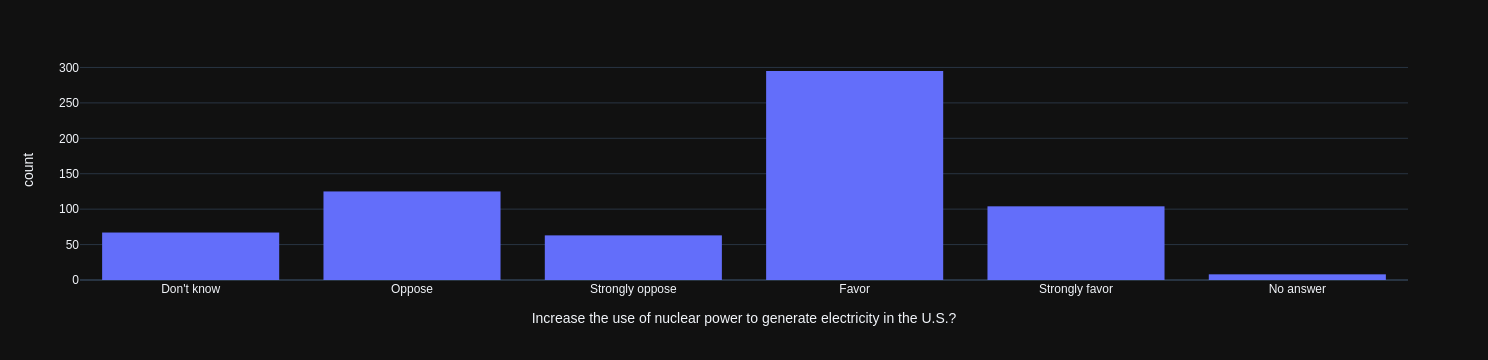

In [60]:

my_dict = {'Inapplicable':0,
           'Strongly favor':0,
           'Favor':0,
           'Oppose':0,
           'Strongly oppose':0,
           "Don't know":0,
           'No answer':0
          }
'''
0) Inapplicable	3930	80.2
1) Strongly favor	141	2.9
2) Favor	441	9.0
3) Oppose	196	4.0
4) Strongly oppose	87	1.8
8) Don't know	96	2.0
9) No answer	10	0.2
'''
for i in df_sav['NUKEELEC']:
    
    if i == 0:
        my_dict['Inapplicable'] += 1
    elif i == 1:
        my_dict['Strongly favor'] += 1
    elif i == 2:
        my_dict['Favor'] += 1
    elif i == 3:
        my_dict['Oppose'] += 1
    elif i == 4:
        my_dict['Strongly oppose'] += 1
    elif i == 5:
        my_dict["Don't know"] += 1
    elif i == 6:
        my_dict["No answer"] += 1   
    pass

#Not sure why so many are Inapplicable
my_dict.pop('Inapplicable')
my_dict.pop('No answer')
my_dict.pop("Don't know")


'''
fig = px.bar(x = my_dict.values(), y = my_dict.keys(), title="Attitudes towards Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()
fig = px.pie(values = my_dict.values(), names = my_dict.keys(), title="Attitudes towards Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()
'''
fig = px.histogram(df_clean_nuke_1, x="NUKEELEC", barmode="group", template='plotly_dark').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?"
)
fig.show()


Like the Bisconti data, the GSS data shows that most people are in support. However, only hesitantly are these people on the favor side. 

This could be after many years of high expectations of nuclear energy, the people still feel nuclear energy still has the same problems that it did many years ago

["('Oppose', 'Very dangerous')",
 "('Strongly oppose', 'Extremely dangerous for the environment')",
 "('Favor', 'Very dangerous')",
 "('Favor', 'Somewhat dangerous')",
 "('Oppose', 'Somewhat dangerous')",
 "('Strongly favor', 'Not dangerous at all for the environment')",
 "('Favor', 'Extremely dangerous for the environment')",
 "('Oppose', 'Extremely dangerous for the environment')",
 "('Strongly oppose', 'Very dangerous')",
 "('Strongly favor', 'Extremely dangerous for the environment')",
 "('Strongly favor', 'Somewhat dangerous')",
 "('Favor', 'Not very dangerous')",
 "('Favor', 'Not dangerous at all for the environment')",
 "('Strongly favor', 'Very dangerous')",
 "('Strongly favor', 'Not very dangerous')",
 "('Strongly oppose', 'Somewhat dangerous')",
 "('Oppose', 'Not very dangerous')",
 "('Strongly oppose', 'Not very dangerous')"]


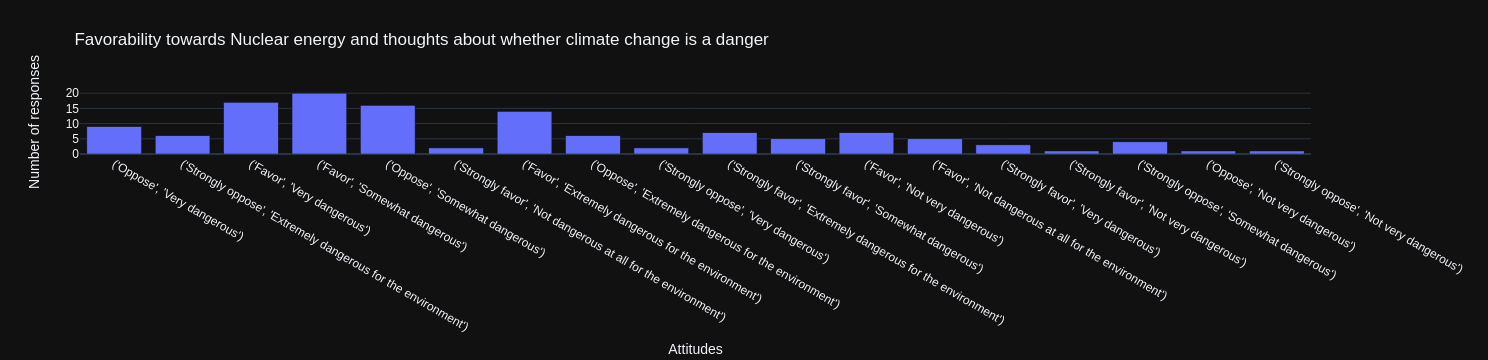

In [61]:
import math
import plotly.express as px
import pprint
import plotly.figure_factory as ff
import chart_studio.plotly as py
'''
TEMPGEN1
0) Inapplicable	614	30.0
1) Extremely dangerous for the environment	286	14.0
2) Very dangerous	364	17.8
3) Somewhat dangerous	416	20.4
4) Not very dangerous	181	8.9
5) Not dangerous at all for the environment	78	3.8
8) Don't know	100	4.9
9) No answer	5	0.2
'''
climate_nuclear_dict = {}


for ind in df.index:
    #print(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])
    if (df['NUKEELEC'][ind], df['TEMPGEN1'][ind]) not in climate_nuclear_dict:
        climate_nuclear_dict[(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])] = 1
    else:
        climate_nuclear_dict[(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])] += 1
    #if "favor" in df_sav['NUKEELEC'][ind]:
        #print(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])
        #pass
    pass


climate_nuclear_dict_short = {}


# These values are unless. Inapplicable also makes up a LARGE amount of responses.
for key, value in climate_nuclear_dict.items():
    if "Inapplicable" not in key and "Don't know" not in key and "No answer" not in key:
        if not pd.isna(key[1]):
            climate_nuclear_dict_short[key] = value
        pass

'''
NOTE: MANY values in TEMPGEN1 (climate change thoughts were MISSING from the study. 
Not sure why, but I've checked it the multiple file formats they gave me

'''
climate_nuclear_dict_copy = climate_nuclear_dict_short.copy()

freq_list = list(climate_nuclear_dict_short.values())
combos_list = list(climate_nuclear_dict_short.keys())

#pprint.pprint(freq_list)

for index, a in enumerate(combos_list):
    combos_list[index] = str(a)

pprint.pprint(combos_list)    

fig = px.bar(x = combos_list, y = freq_list, title="Favorability towards Nuclear energy and thoughts about whether climate change is a danger", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
# fig.show()

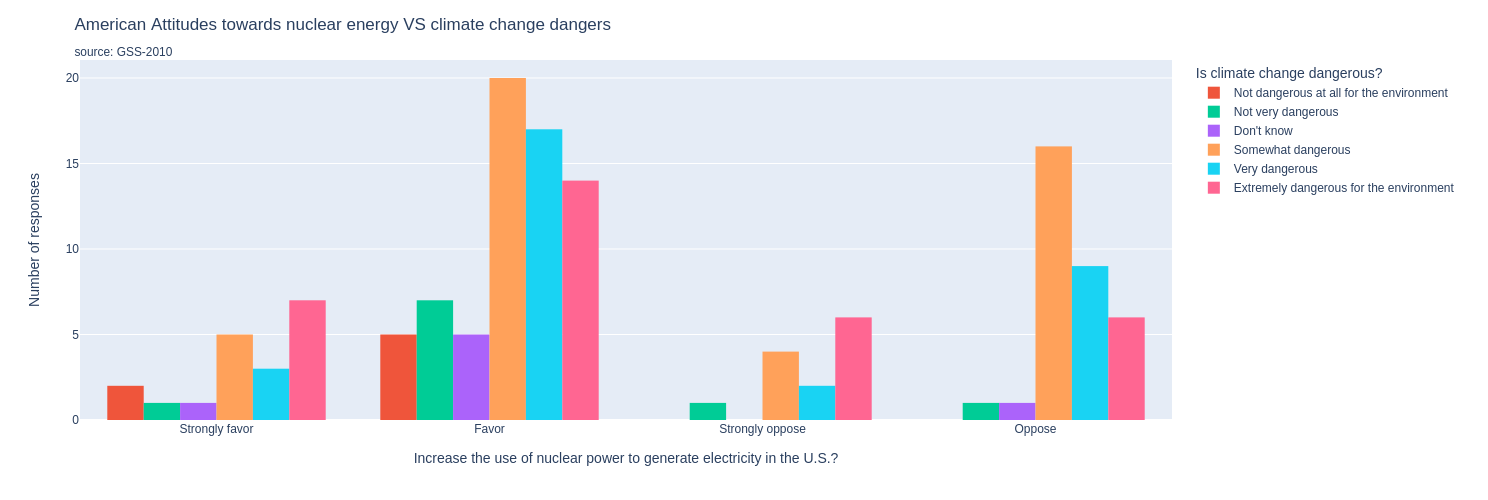

Favor              441
Oppose             196
Strongly favor     141
Strongly oppose     87
Name: NUKEELEC, dtype: int64


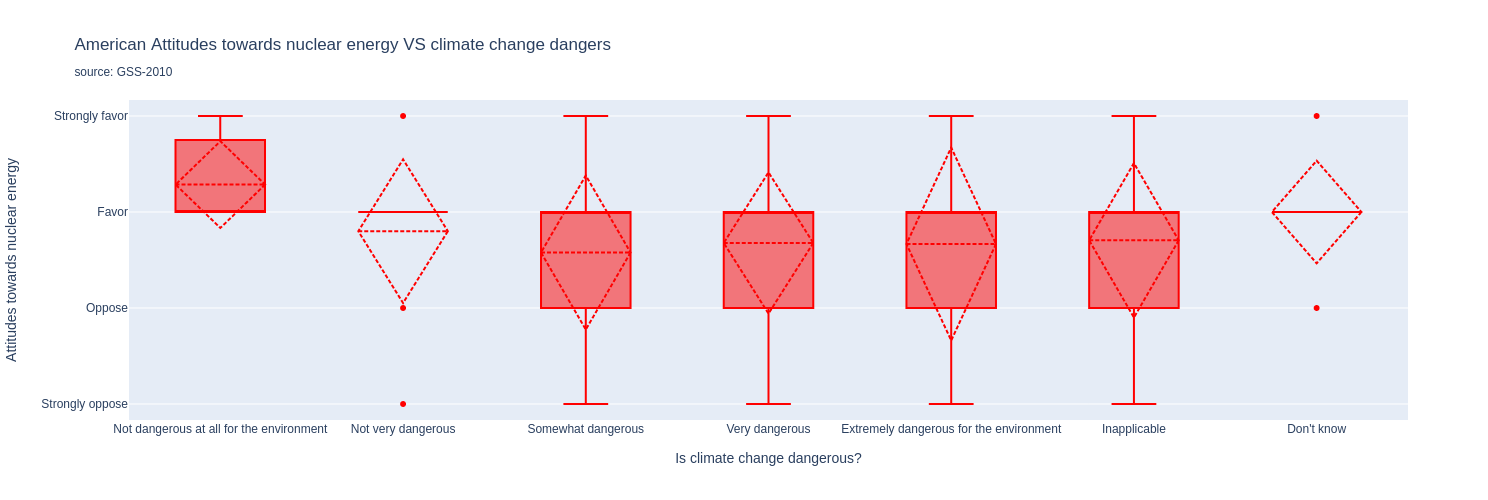

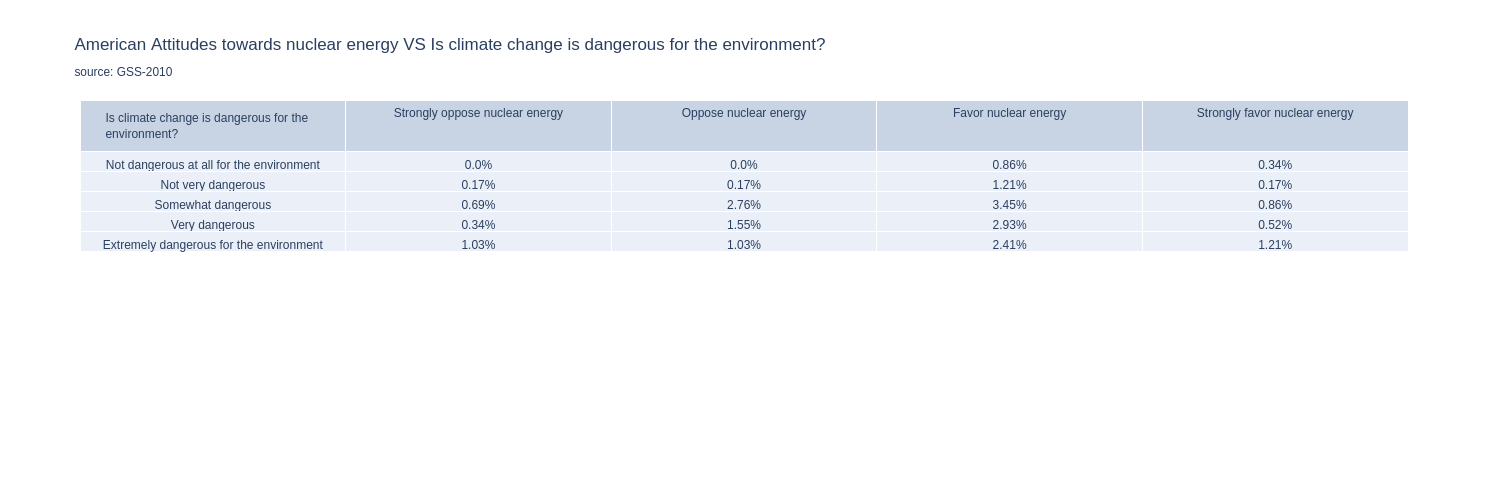

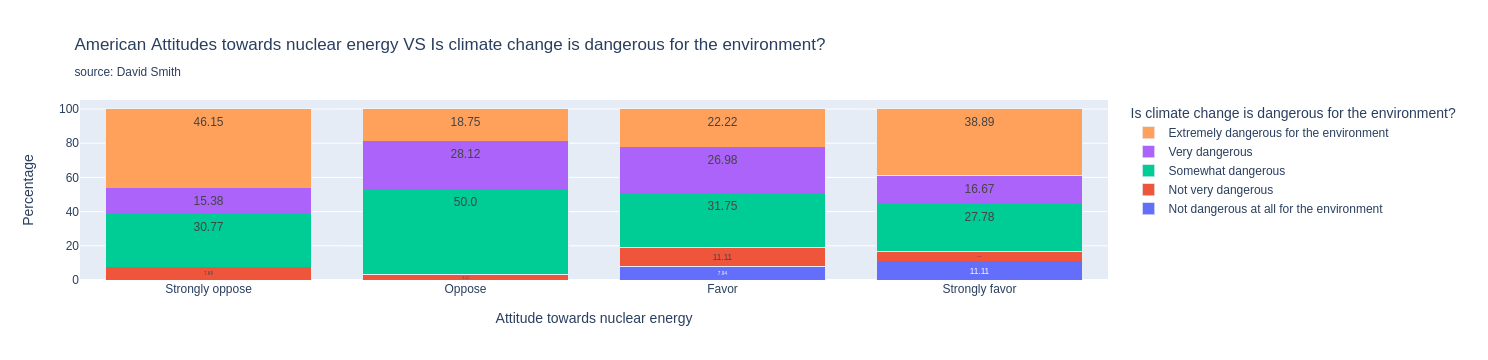

In [94]:
# This might be a better way to display the above data

# drop all Inapplicable
#df_clean_nuke = df.copy()
#df_clean_nuke = df_clean_nuke[df_clean_nuke.NUKEELEC != 'Inapplicable']
#df_clean_nuke = df_clean_nuke[df_clean_nuke.TEMPGEN1 != 'Inapplicable']

danger_list = ["Not dangerous at all for the environment", "Not very dangerous", "Don't know", "Inapplicable", "No answer", "Somewhat dangerous", "Very dangerous", "Extremely dangerous for the environment"]

import numpy as np
import math
conditions = [(df_clean_nuke_1['TEMPGEN1'] == danger_list[0]), (df_clean_nuke_1['TEMPGEN1'] == danger_list[1]),
              (df_clean_nuke_1['TEMPGEN1'] == danger_list[2]), (df_clean_nuke_1['TEMPGEN1'] == danger_list[3]), 
              (df_clean_nuke_1['TEMPGEN1'] == danger_list[4]), (df_clean_nuke_1['TEMPGEN1'] == danger_list[5]),
              (df_clean_nuke_1['TEMPGEN1'] == danger_list[6]), (df_clean_nuke_1['TEMPGEN1'] == danger_list[7]),
              (df_clean_nuke_1['TEMPGEN1'] == math.nan)]
choices = [0,1,2,3,4,5,6,7,8]
df_clean_nuke_1['order'] = np.select(conditions, choices)
df_clean_nuke_1 = df_clean_nuke_1.sort_values(by='order')

# print(df_clean_nuke_1[['TEMPGEN1', 'order']][:10])
# print(df_clean_nuke_1[['TEMPGEN1', 'order']][400:410])
# print(df_clean_nuke_1[['TEMPGEN1', 'order']][10:])

drop_vals(df_clean_nuke_1)
fig = px.histogram(df_clean_nuke_1, x="NUKEELEC", color="TEMPGEN1", barmode="group").update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Is climate change dangerous?"
)
fig.update_layout(height=500, title_text="American Attitudes towards nuclear energy VS climate change dangers<br><sub>source: David Smith")
fig.show()

mean_df = mean_df_gen("TEMPGEN1")

mean_df.columns =["Is climate change dangerous?", "Mean of support"]
fig = ff.create_table(mean_df)
#fig.show()

cc_df = df_clean_nuke.copy()
# cc_df = cc_df[cc_df.NUKEELEC != 'Inapplicable']
# cc_df = cc_df[cc_df.NUKEELEC != 'No answer']
# cc_df = cc_df[cc_df.NUKEELEC != "Don't Know"]
# cc_df = cc_df[cc_df.TEMPGEN1 != 'Inapplicable']
#cc_df = cc_df[cc_df.TEMPGEN1 != 'Inapplicable']
danger_list2 = danger_list.copy()
danger_list2.remove('Inapplicable')
danger_list2.remove('No answer')
danger_list2.remove("Don't know")

drop_vals(cc_df)
print(cc_df["NUKEELEC"].value_counts())
fig = go.Figure()
fig.add_trace(go.Box(
    y=cc_df["NUKEELEC"],
    x=cc_df["TEMPGEN1"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(categoryorder='array', categoryarray=danger_list2)
fig.update_layout(height=500, title_text="American Attitudes towards nuclear energy VS climate change dangers<br><sub>source: David Smith",
                  yaxis_title="Attitudes towards nuclear energy",
                  xaxis_title="Is climate change dangerous?",
                 )
fig.show()

cc_df2 = drop_cust_vals(cc_df, "TEMPGEN1", 'Inapplicable')
create_table(cc_df2, "TEMPGEN1", danger_list2, "Is climate change is dangerous for the environment?")
percentage_bar(cc_df2, "TEMPGEN1", danger_list2, "Is climate change is dangerous for the environment?")

# Climate change

- Majority of responses show that respondants only favor nuclear energy
- Those woh doesn't think nuclear energy are in support of it, which would make logical sense
- However those who do think it's extremely dangerous, are still only neutral on the topic. They generally are not against nuclear energy
- The don't know category is so high likely because of the low amount of "dont know" responses

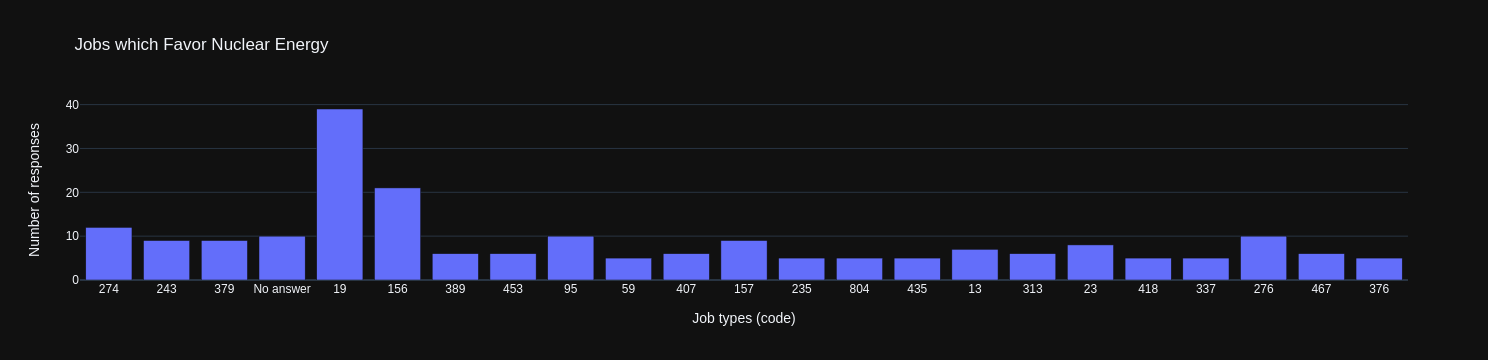

In [63]:
import collections

# Respondent's occupation
# occupation code in PDF
col_code = "OCC80"
strongly_favor_occup = {}
for i in df.index:
    if df['NUKEELEC'][i] == "Strongly favor":
        #print(df['NUKEELEC'][i])
        if df[col_code][i] not in strongly_favor_occup:
            strongly_favor_occup[df[col_code][i]] = 1
        else:
            strongly_favor_occup[df[col_code][i]] += 1

favor_occup = {}
for i in df.index:
    if df['NUKEELEC'][i] == "Favor":
        if df[col_code][i] not in favor_occup:
            favor_occup[df[col_code][i]] = 1
        else:
            favor_occup[df[col_code][i]] += 1
            
favor_occup_short = {}

for key, value in favor_occup.items():
    if value > 4:
        favor_occup_short[key] = value
        
fig = px.bar(x = favor_occup_short.keys(), y = favor_occup_short.values(), title="Jobs which Favor Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Job types (code)", yaxis_title="Number of responses"
)
fig.show()

#len(strongly_favor_occup)
#strongly_favor_occup
#favor_occup
#favor_occup_short

# count frequency of jobs
#count = collections.Counter(df[col_code])
#res = {key: val for key, val in sorted(dict(count).items(), key = lambda ele: ele[1], reverse = True)}
#res

In [64]:
# Spouse's occupational prestige (See Note 2: Occupational Prestige and Socioeconomic Index Scores on ARDA summary page)
col_code = 'SPPRES80'
# Respondent's occupational prestige
col_code = 'PRESTG80'

count = collections.Counter(df[col_code])
res = {key: val for key, val in sorted(dict(count).items(), key = lambda ele: ele[1], reverse = True)}
#res

In [65]:
import plotly.express as px
import plotly.graph_objects as go

# Sort the amount of favorability of nuclear energy based on occupation prestige

df_clean_nuke = df.copy()

# drop all Inapplicable
index_names = df_clean_nuke[ df_clean_nuke['NUKEELEC'] == 'Inapplicable' ].index
df_clean_nuke.drop(index_names, inplace = True)

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="PRESTG80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Occupation Prestige"
)
# fig.show()
# category ascending
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="PRESTG80", template='plotly_dark').update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Occupation Prestige"
)
# fig.show()

fig = px.violin(df_clean_nuke, x="NUKEELEC", y="PRESTG80").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
                                                                       ).update_yaxes(categoryorder='category ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Job prestige of respondent",
)
# fig.show()

mean_df = mean_df_gen("PRESTG80")

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["PRESTG80"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(
    categoryorder='category ascending')
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
# fig.show()

#numbers of respondants per prestige
df_clean_nuke["PRESTG80"].value_counts()
fig = px.histogram(df_clean_nuke, x="PRESTG80", template='plotly_dark').update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="NUMBER OF RESPONDANTS PER prestige", yaxis_title="Number of responses")
# fig.show()

### Occupation prestige



- Those with lower prestige are the ones which mostly oppose nuclear energy. This might because the education level to have these types of jobs is lower, so perhaps they are not as informed.
- Largest group by part is workers with prestige of 51. These include, but are not limited to: computer programmers, health practitioners, Radio and television announcers
    * These types of positions lean towards favoring. Perhaps because they are more informed, or have more enthusism for the science behind it. Another possibility is that moetariy, swithching to nuclear won't benifit their jobs, or perhaps will benefit.
    * Perhaps because many of these types of jobs require good communication skills that they are more willing to take the survey and give their opinion
- Lots of lower prestige jobs from 29-36 are also present. These are the types which strongly oppose or oppose. Perhaps it's because there's a mistrust in politicans? 
    * NOTE TO SELF: Check if GSS value for trust in politicans
- Around the 64 - 66 range, there is a slightly growth of favortism

In [66]:
# R's occupation
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="OCC80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Occupation", yaxis_title="Number of responses", legend_title = "occupation"
)
#fig.show()

fig = px.histogram(df_clean_nuke, x="OCC80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Occupation", yaxis_title="Number of responses", legend_title = "occupation"
)
# fig.show()


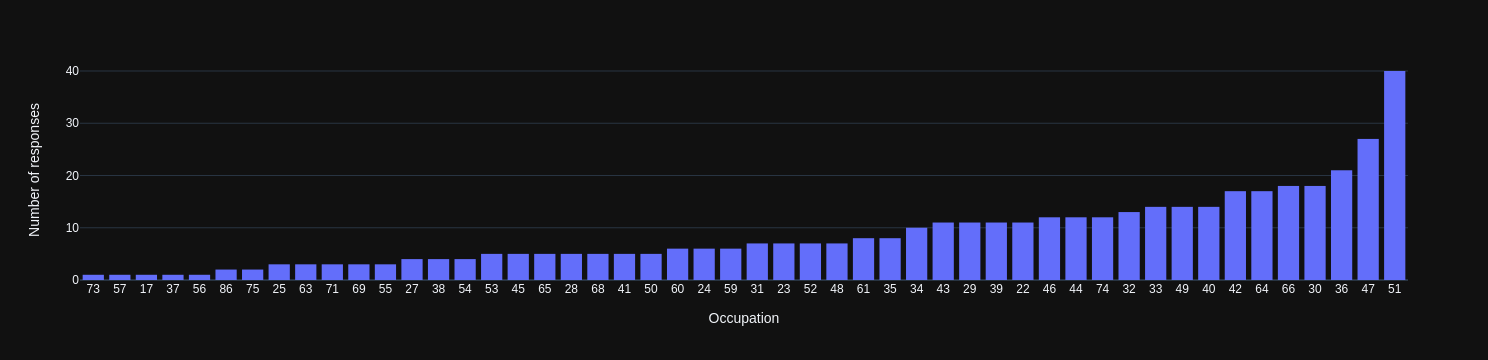

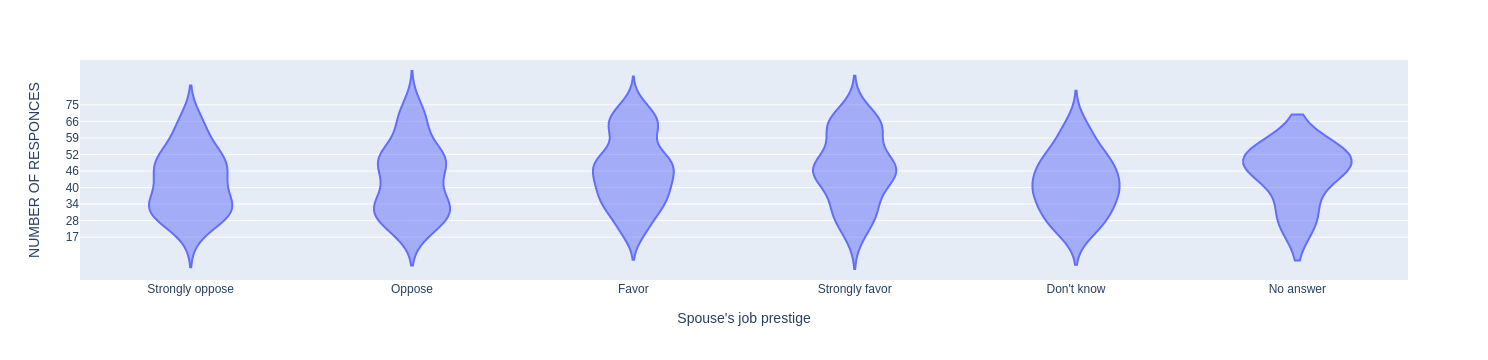

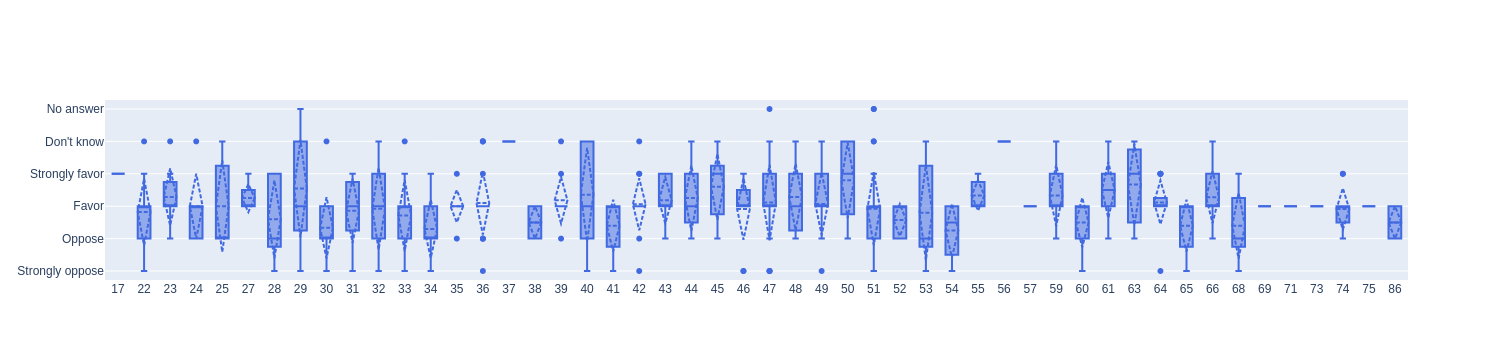

In [67]:
# Spouse's job prestige

df_clean_nuke_spouse = df_clean_nuke[df_clean_nuke.SPPRES80.str.contains('\\d', na=False, regex=True)].copy()

# number of respondants per occupation prestige
fig = px.histogram(df_clean_nuke_spouse, x="SPPRES80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Occupation", yaxis_title="Number of responses", legend_title = "occupation"
)
fig.show()

# print all values in SPPRES80 which are a digit (prestige num)
#print(df_clean_nuke[df_clean_nuke.SPPRES80.str.contains('\\d', na=False, regex=True)]["SPPRES80"])

# Don't know, NA, IAP

fig = px.histogram(df_clean_nuke_spouse, x="NUKEELEC", color="SPPRES80", template='plotly_dark')
#fig.show()

fig = px.violin(df_clean_nuke_spouse, x="NUKEELEC", y="SPPRES80").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
                                                                       ).update_yaxes(categoryorder='category ascending').update_layout(
xaxis_title="Spouse's job prestige", yaxis_title="NUMBER OF RESPONCES", legend_title="Job prestige OF RESPONDENT",
)
fig.show()

mean_df = mean_df_gen("SPPRES80")

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke_spouse["NUKEELEC"],
    x=df_clean_nuke_spouse["SPPRES80"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(
    categoryorder='category ascending')
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

# Spouse's job prestige

Like before, jobs of prestige num 51 are mostly represented 

Like prestige,we see that spouse prestige levels below 50 generally oppose nuclear energy

In [68]:
# drop all Inapplicable

fig = px.histogram(df_clean_nuke, x="CHILDS", barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses", legend_title = "Number of children"
)
# fig.show()


# CHILDS

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="CHILDS", barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses", legend_title = "Number of children"
)
# fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["CHILDS"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))#.update_yaxes(categoryorder='array', categoryarray=fav_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
# fig.show()

mean_df = mean_df_gen("CHILDS")

fig = px.line(mean_df, x="CHILDS", y="NUKEELEC", title="Number of children VS mean of Nuclear Energy support", markers=True)
# fig.show()


It seems the more children you have, the more you support nuclear.

But generally people have 4 or less kids

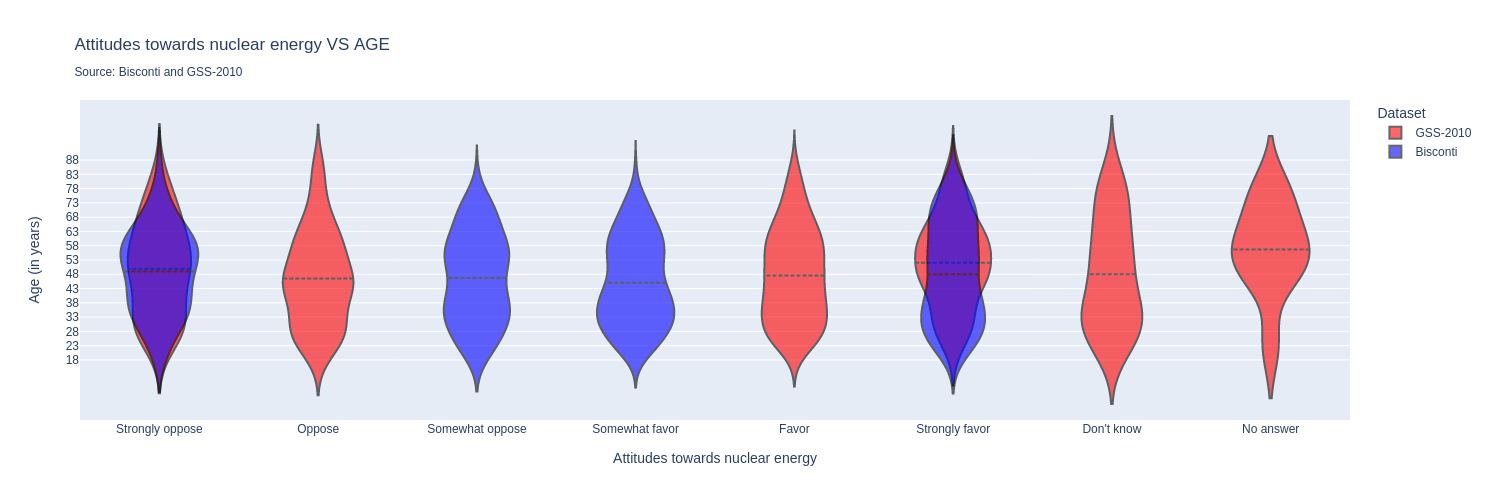

No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
Favor              441
Oppose             196
Strongly favor     141
Strongly oppose     87
Name: NUKEELEC, dtype: int64


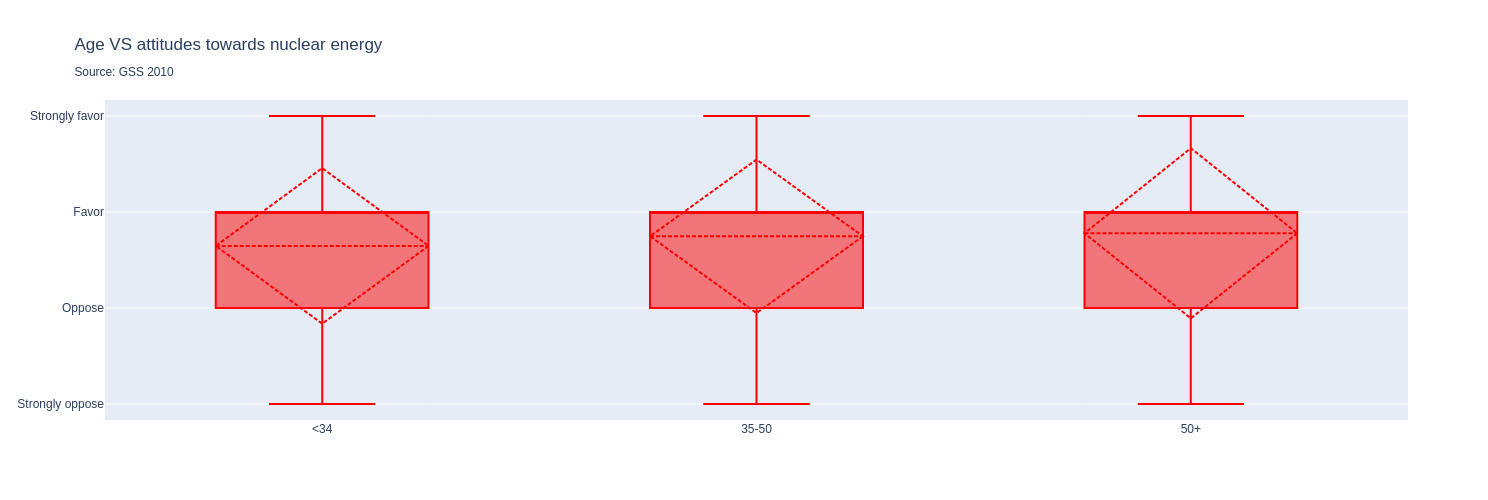

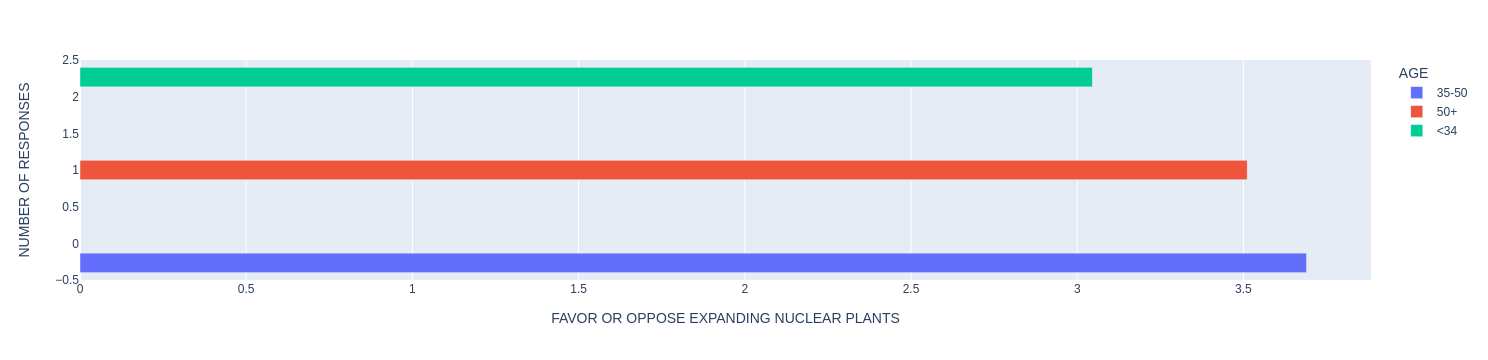

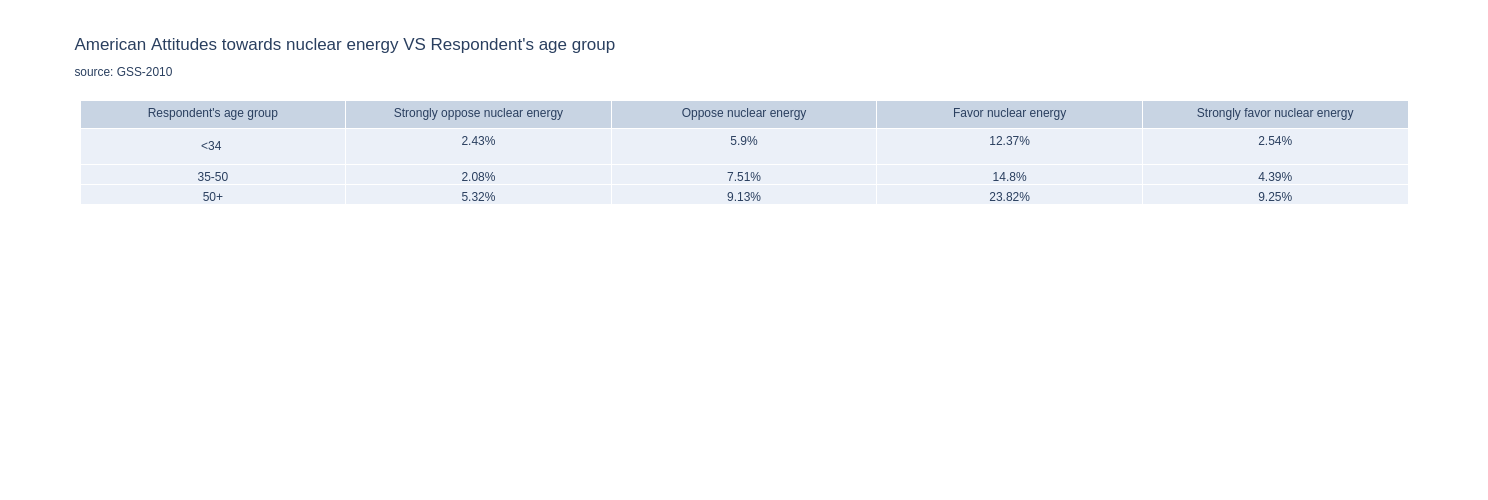

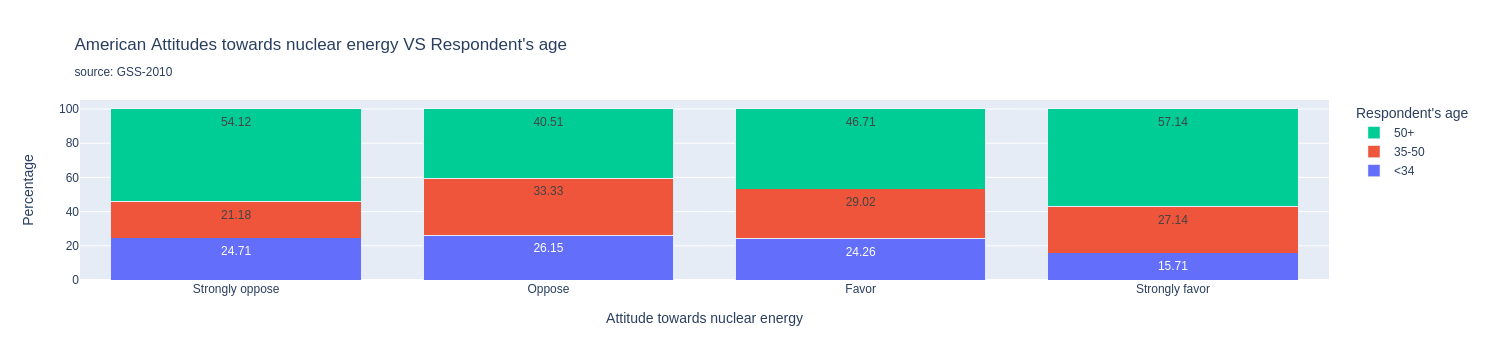

In [69]:
# Age

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="AGE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Age", yaxis_title="Number of responses", legend_title = "Age?"
)
# fig.show()

# gradual age
df_age_range = df_clean_nuke[["NUKEELEC", "AGE"]].copy()
df_age_range_temp  = df_age_range[df_age_range.AGE != '89 or older']
df_age_range_temp  = df_age_range_temp[df_age_range_temp.AGE != 'No answer']


fig = px.violin(df_age_range_temp, x="NUKEELEC", y="AGE").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
                                                                       ).update_yaxes(categoryorder='category ascending').update_layout(
xaxis_title="Nuclear energy?", yaxis_title="NUMBER OF RESPONCES",
)
# fig.show()


fig = go.Figure(data=go.Violin(x=df_age_range_temp['NUKEELEC'], y=df_age_range_temp['AGE'], box_visible=False, line_color='black',
                               meanline_visible=True, fillcolor='red', opacity=0.6, name="David Smith"
                               )
               )

#Bisconti age
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Bisconti")
bisc_df = pd.read_excel("2206631 - Final Data excel .xlsx")
fav_comb = ["Strongly oppose", "Oppose", "Somewhat oppose", "Somewhat favor", "Favor", "Strongly favor"]

fig.add_trace(go.Violin(x=bisc_df['Q10'], y=bisc_df['Q2'], box_visible=False, line_color='black',
                               meanline_visible=True, fillcolor='blue', opacity=0.6, name="Bisconti"
                               )
    )
fig.update_xaxes(categoryorder='array', categoryarray=fav_comb).update_yaxes(categoryorder='category ascending')
fig.update_layout(yaxis_zeroline=False, height=500, legend_title="Dataset", xaxis_title="Attitudes towards nuclear energy", yaxis_title="Age (in years)",
                 title_text="Attitudes towards nuclear energy VS AGE<br><sub>Source: Bisconti and David Smith")
fig.show()


def age_range(x):
    try:
        int_x = int(x)
    except ValueError as e:
        print(f"{x} can't be cast to int: ", e)
        if x.startswith("89"):
            return "50+"
        return None
    
    if int_x < 34:
        return "<34"
    elif int_x > 34 and int_x < 50:
        return "35-50"
    else:
        return "50+"

    
df_age_range['AGE'] = df_age_range['AGE'].apply(age_range)

fig = px.bar(df_age_range, x="NUKEELEC", color="AGE", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="AGE",
)
# fig.show()

#df_age_range_temp2  = df_age_range[df_age_range.NUKEELEC != 'No answer']
df_age_range_2 = df_age_range.copy()
df_age_range_2['NUKEELEC'] = df_age_range_2['NUKEELEC'].map({"Strongly oppose":"Strongly oppose", "Oppose":"Oppose", "Don't know":"Don't know/No answer", "Favor":"Favor", 
                                                       "Strongly favor":"Strongly favor", "No answer": "Don't know/No answer"})
drop_vals(df_age_range_2)
print(df_age_range_2["NUKEELEC"].value_counts())
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_age_range_2["NUKEELEC"],
    x=df_age_range_2["AGE"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(categoryorder='array', categoryarray=["<34", "35-50", "50+"])
fig.update_layout(title_text="Age VS attitudes towards nuclear energy<br><sub>Source: GSS 2010", height=500)
fig.show()

mean_df = mean_df_gen("AGE", df_age_range)
fig = px.bar(mean_df, x="NUKEELEC", color="AGE", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="AGE",
)
fig.show()

#df_clean_nuke["AGE"].value_counts()
df_age_range['AGE'].value_counts()
df_age_range['AGE'].shape
drop_vals(df_age_range)
create_table(df_age_range, "AGE", ["<34", "35-50", "50+"], "Respondent's age group")
percentage_bar(df_age_range, "AGE", ["<34", "35-50", "50+"], "Respondent's age")

In [70]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns=['A','B','C'])
print (df)

def add_2(x):
    print(type(x))
    return x+2

df['A'] = df['A'].apply(add_2)
print (df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
<class 'int'>
<class 'int'>
<class 'int'>
   A  B  C
0  3  2  3
1  6  5  6
2  9  8  9


### Age

Before the age of 30, there is not many respondants. In fact there are only 4

Most are around the age of 45 to 62

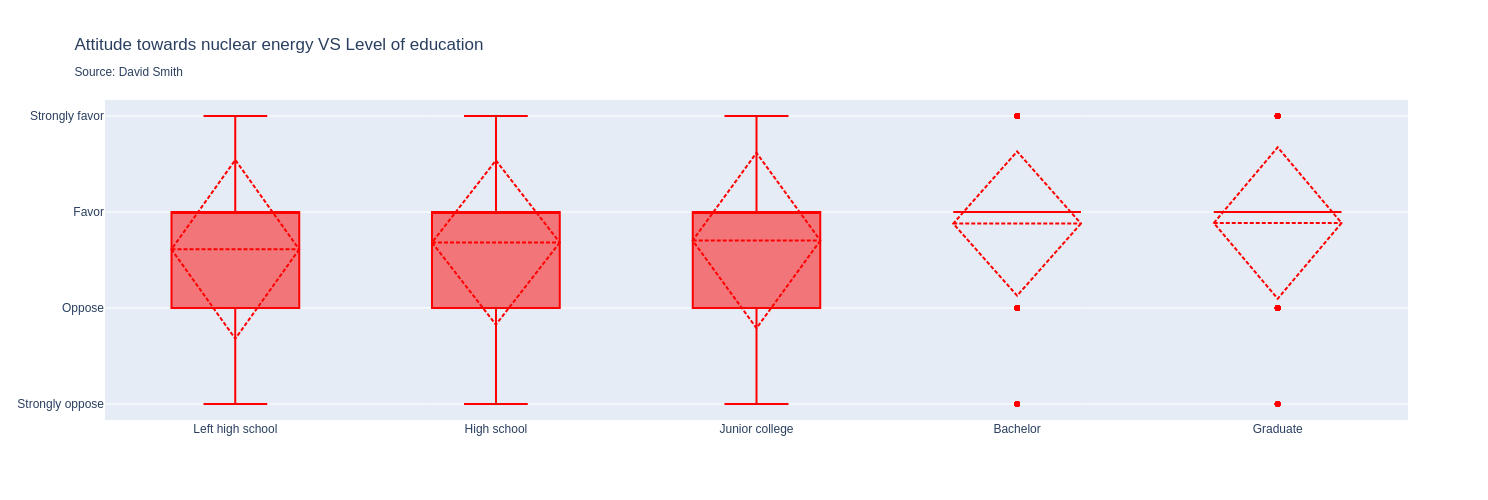

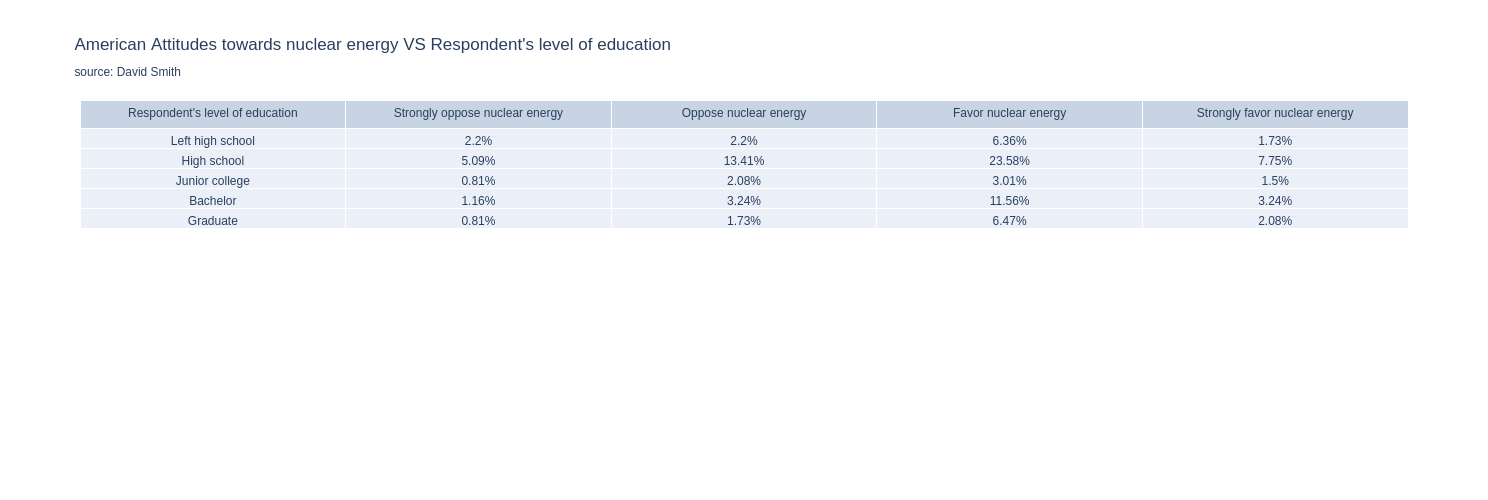

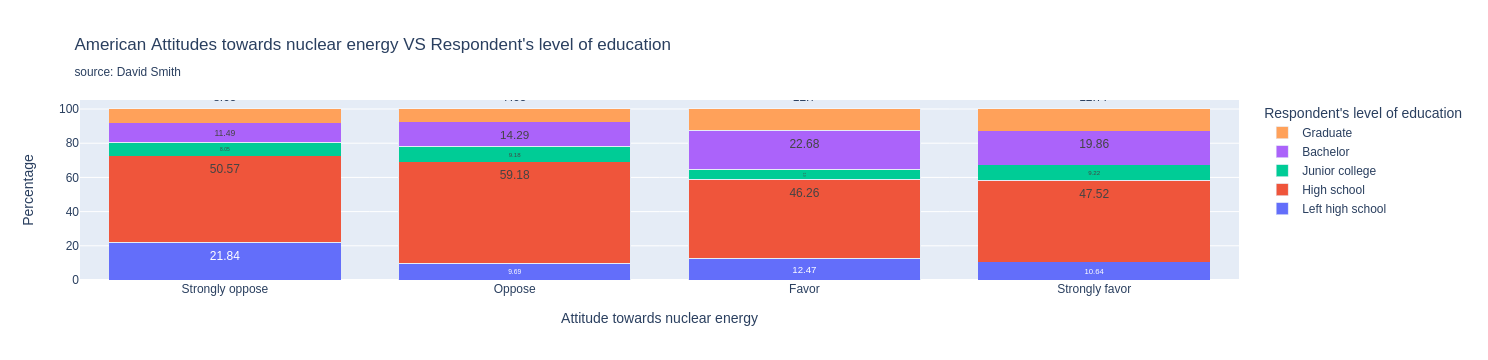

In [72]:
# DEGREE

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="DEGREE", barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Level of education"
)
# fig.show()
edu_list = ["Left high school", "High school", "Junior college", "Bachelor", "Graduate"]

drop_vals(df_clean_nuke)
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["DEGREE"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(categoryorder='array', categoryarray=edu_list)
fig.update_layout(title_text="Attitude towards nuclear energy VS Level of education<br><sub>Source: David Smith")
fig.update_layout(height=500)
fig.show()

df_clean_nuke["DEGREE"].value_counts()

create_table(df_clean_nuke, "DEGREE", edu_list, "Respondent's level of education")
percentage_bar(df_clean_nuke, "DEGREE", edu_list, "Respondent's level of education")

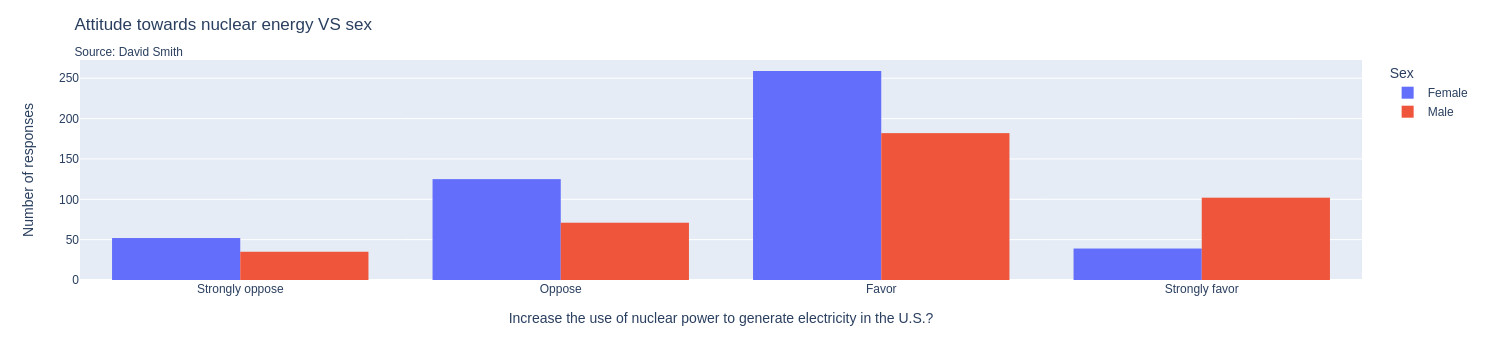

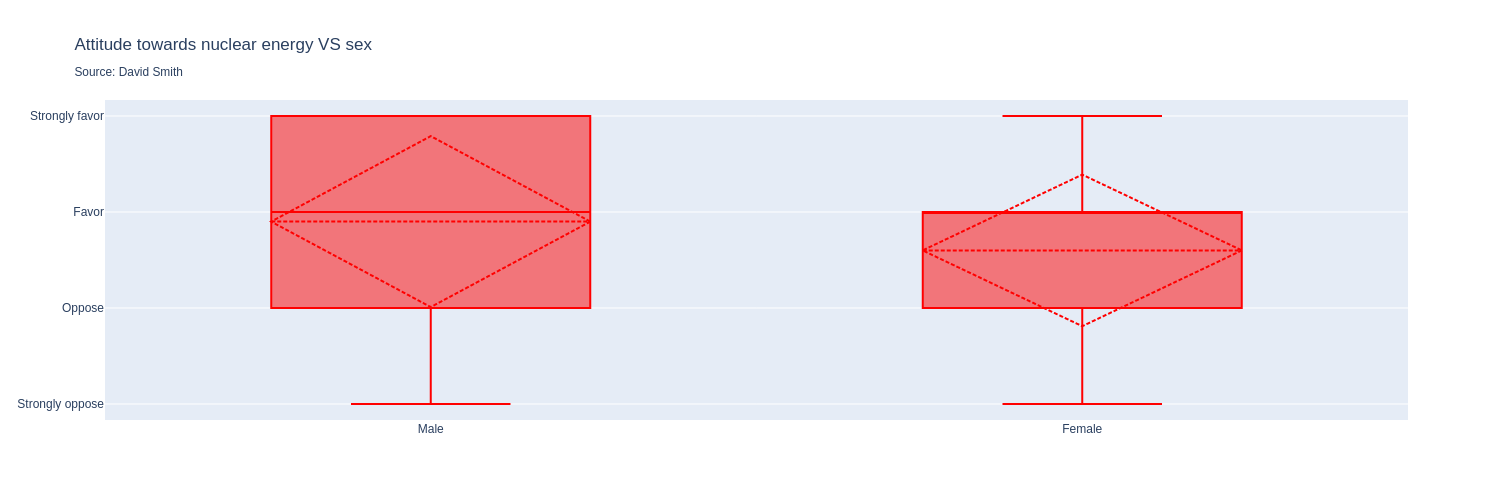

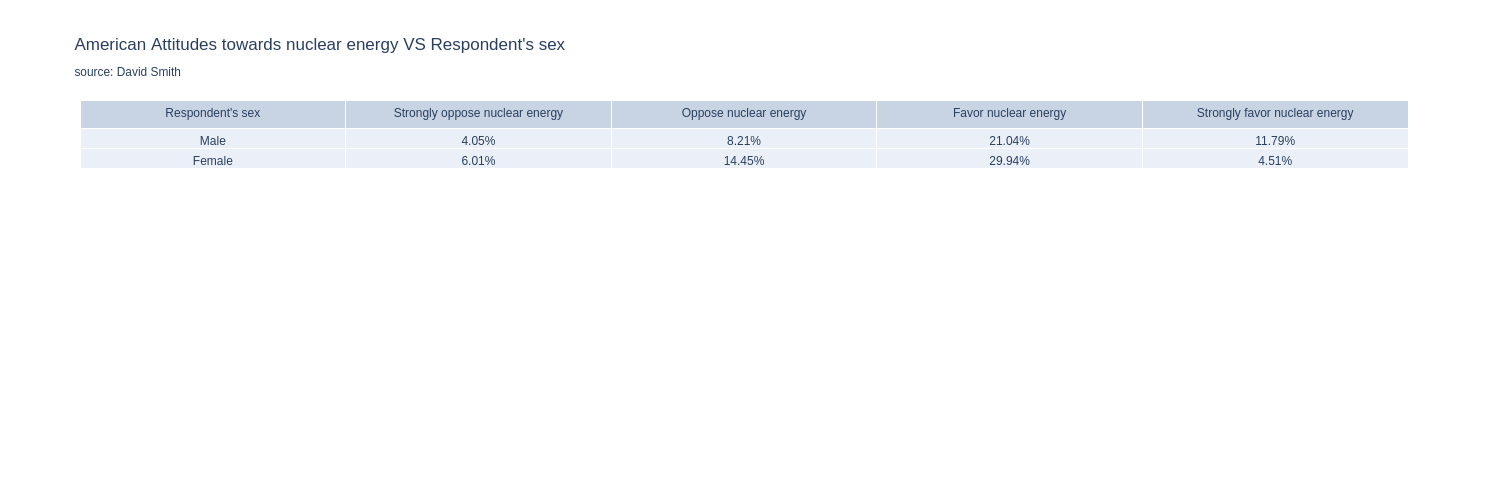

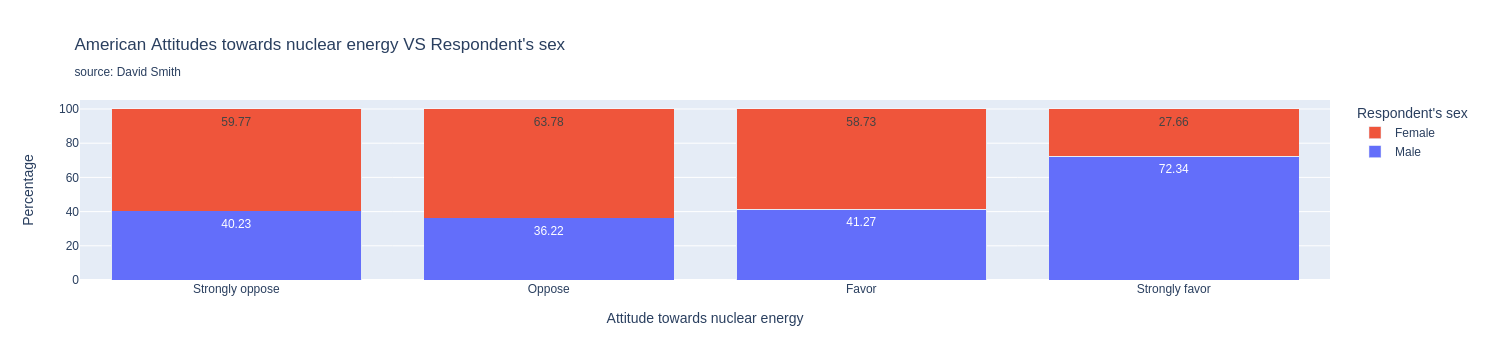

In [73]:
# SEX

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="SEX", barmode="group").update_xaxes(categoryorder='array', categoryarray=fav_list).update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Sex"
)
fig.update_layout(title_text="Attitude towards nuclear energy VS sex<br><sub>Source: David Smith")
fig.show()

drop_vals(df_clean_nuke)
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["SEX"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=["Male", "Female"])
fig.update_layout(title_text="Attitude towards nuclear energy VS sex<br><sub>Source: David Smith")
fig.update_layout(height=500)
fig.show()


create_table(df_clean_nuke, "SEX", ["Male", "Female"], "Respondent's sex")
percentage_bar(df_clean_nuke, "SEX", ["Male", "Female"], "Respondent's sex")

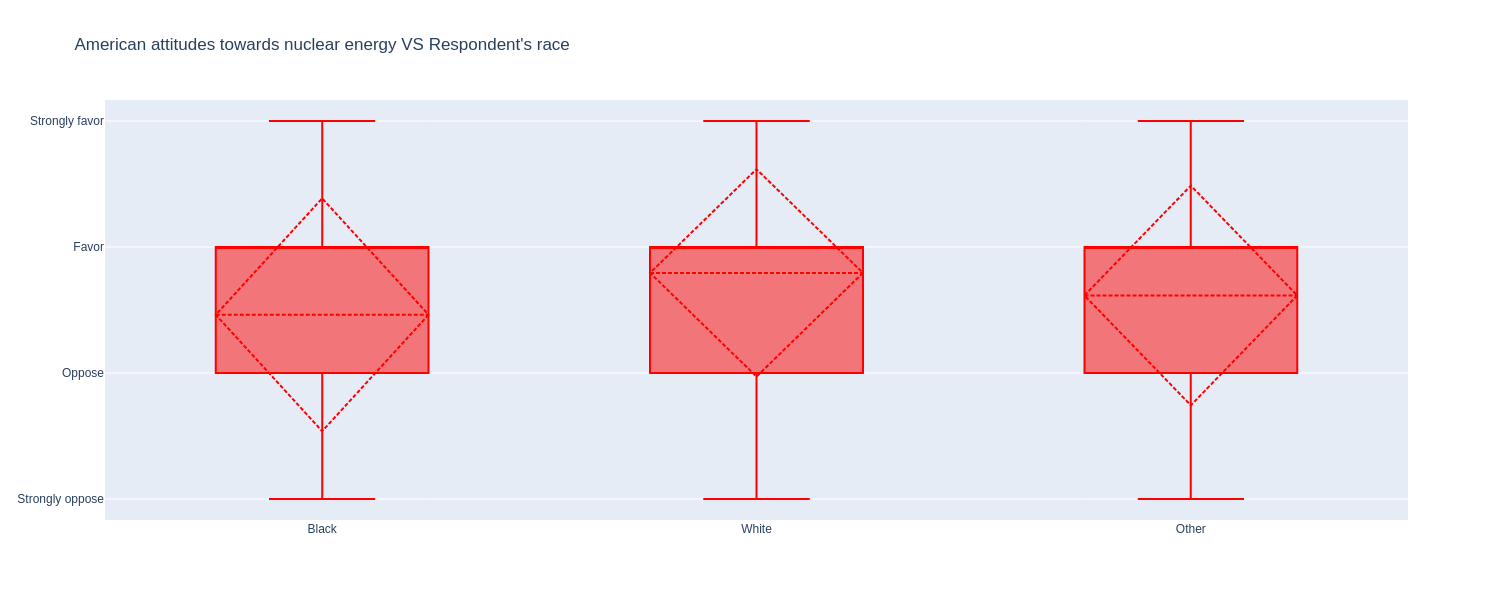

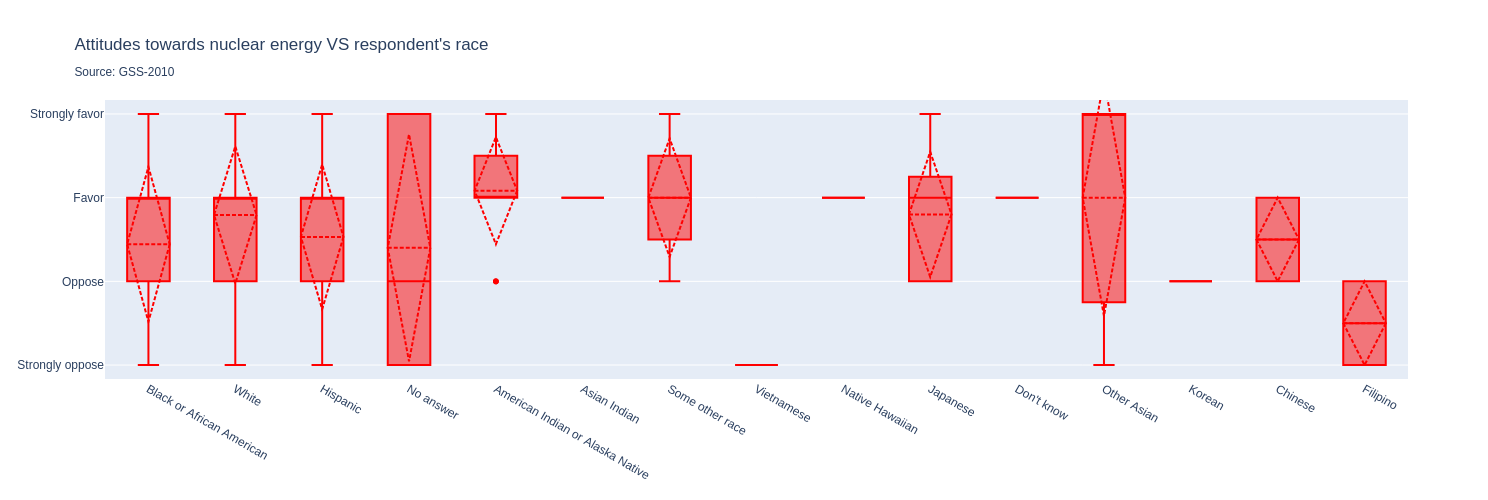

In [ ]:
# RACE

# number of responses 
fig = px.histogram(df_clean_nuke, x="RACE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
# fig.show()

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="RACE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Race", yaxis_title="Number of responses",
)
# fig.show()

mean_df = mean_df_gen("RACE")

fig = px.histogram(mean_df, x="NUKEELEC", y="RACE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Mean of responses", yaxis_title="Race",
)
# fig.show()
#df_clean_nuke["NUKEELEC"].value_counts()
drop_vals(df_clean_nuke)
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["RACE"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(title_text="American attitudes towards nuclear energy VS Respondent's race")
fig.update_layout(height=600)
fig.show()

#929) RACECEN1
#What is your race? Indicate one or more races that you consider yourself to be. First mention
# df_temp = df_clean_nuke[df_clean_nuke.NUKEELEC != 'No answer']

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["RACECEN1"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(height=500, title_text="Attitudes towards nuclear energy VS respondent's race<br><sub>Source: David Smith")
fig.show()


# df_temp2 = df_clean_nuke[df_clean_nuke.RACECEN1 != 'No answer']
# df, compare_col, val_order, y_axis_title = None, cust_fav_list = None
# df_temp3 = df_temp2.copy()
# df_temp3['RACECEN1'] = df_temp3['RACECEN1'].str.replace('Black or African American', 'Black')

race_updated_list = list(dict(df_clean_nuke['RACECEN1'].value_counts()).keys())
# race_updated_list.remove('Black')
# race_updated_list.remove('White')
# for i in race_updated_list:
    # df_temp3['RACECEN1'] = df_temp3['RACECEN1'].str.replace(i, 'Other', regex=False)
    
# print(df_temp3["RACECEN1"].value_counts())

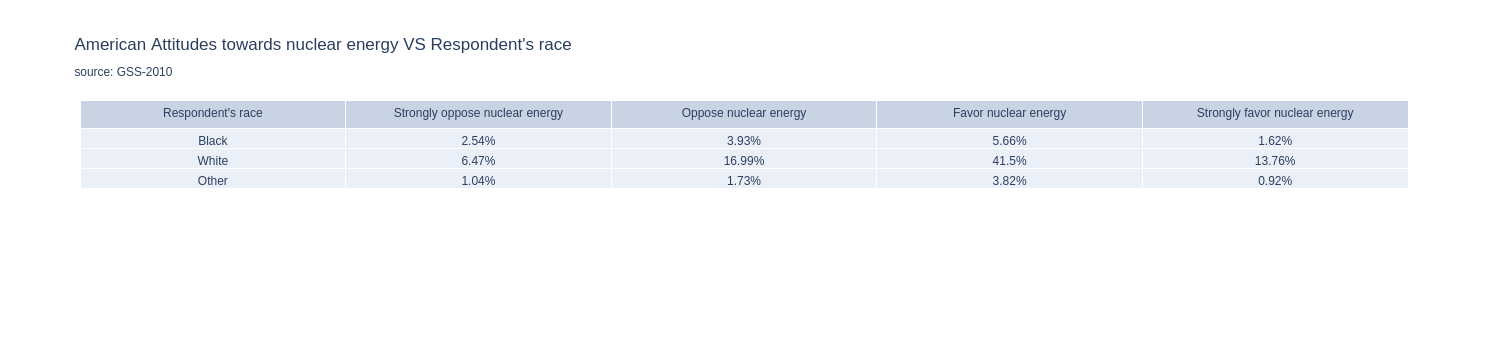

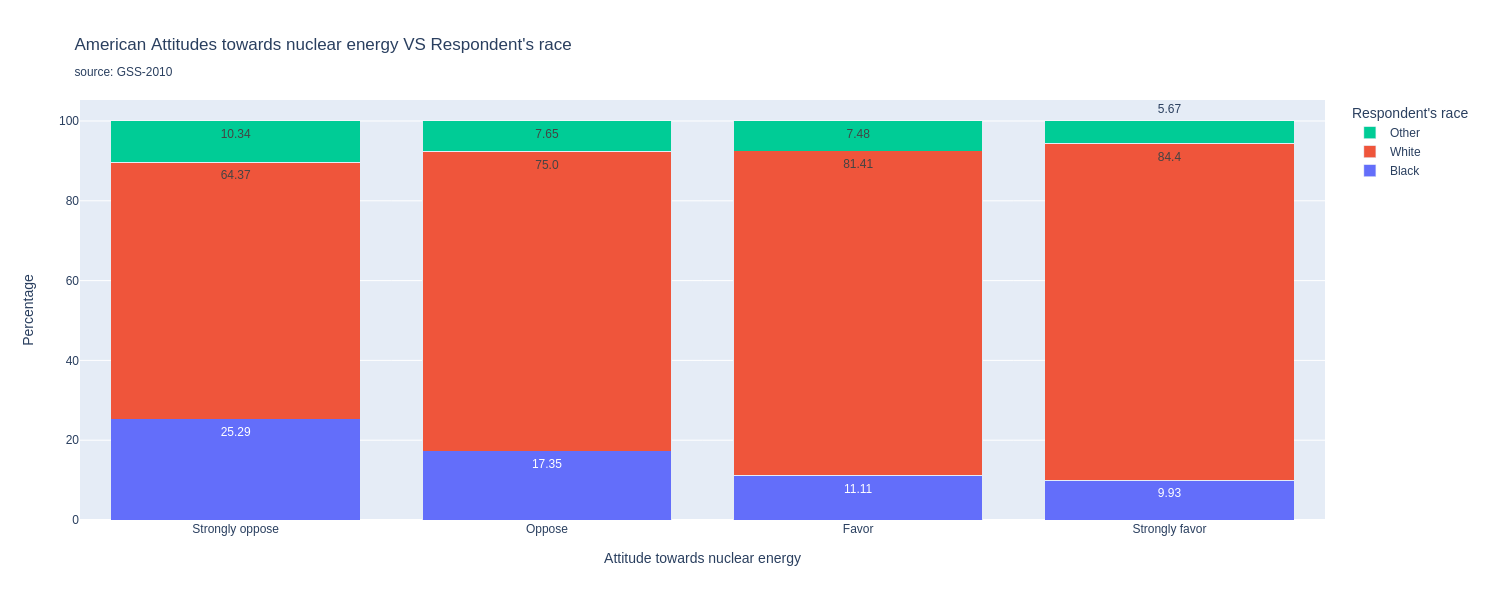

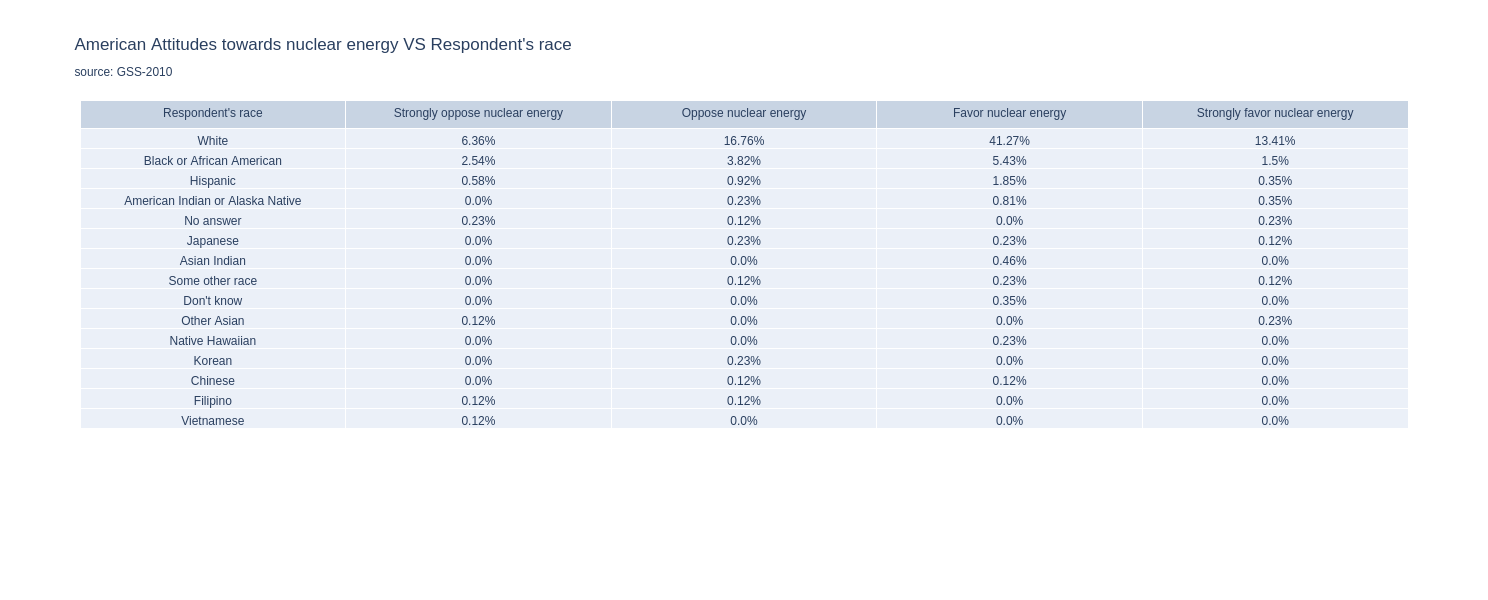

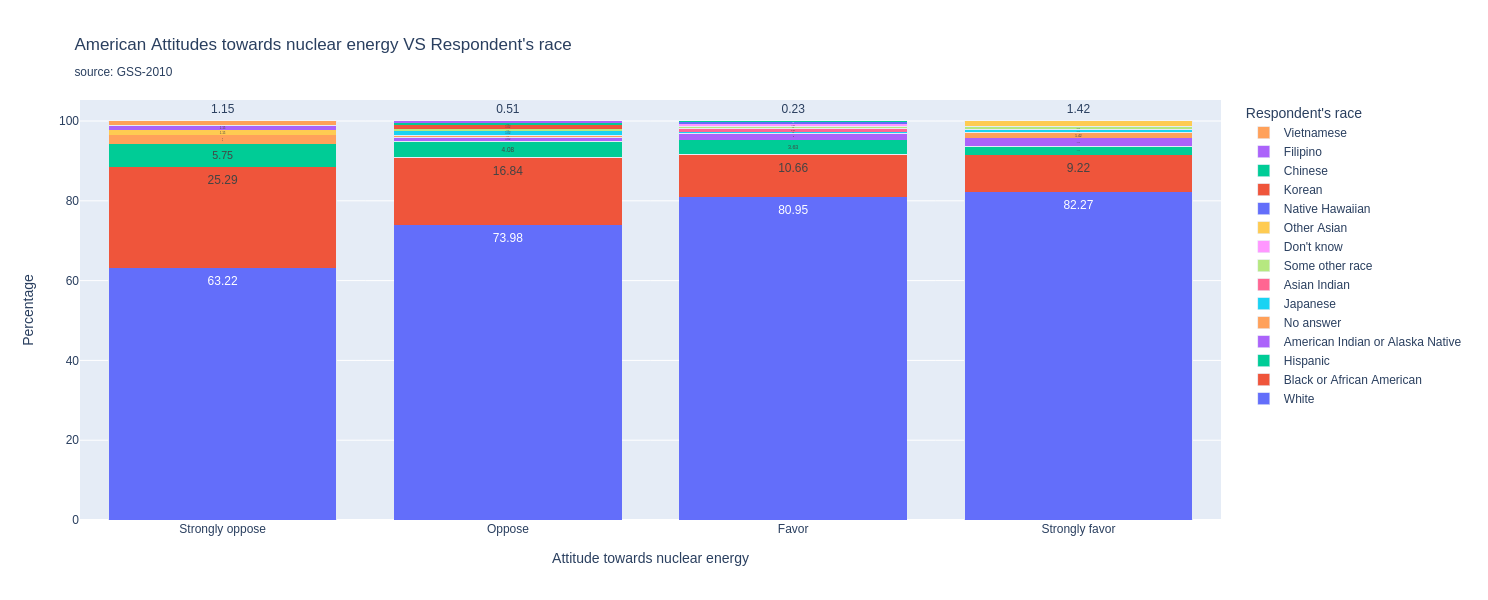

In [91]:
create_table(df_clean_nuke, "RACE", ["Black", "White", "Other"], "Respondent's race",  height=200)
percentage_bar(df_clean_nuke, "RACE", ["Black", "White", "Other"], "Respondent's race", height=600)

create_table(df_clean_nuke, "RACECEN1", race_updated_list, "Respondent's race",  height=600)
percentage_bar(df_clean_nuke, "RACECEN1", race_updated_list, "Respondent's race", height=600)

### Race

a majority of these responses are from white respondants. It is not that useful to look at any group other than white respondants

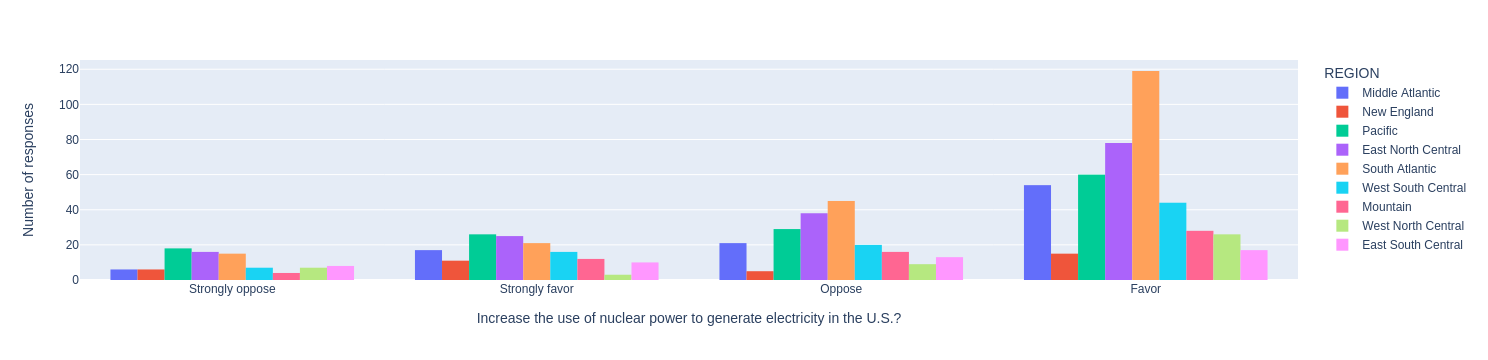

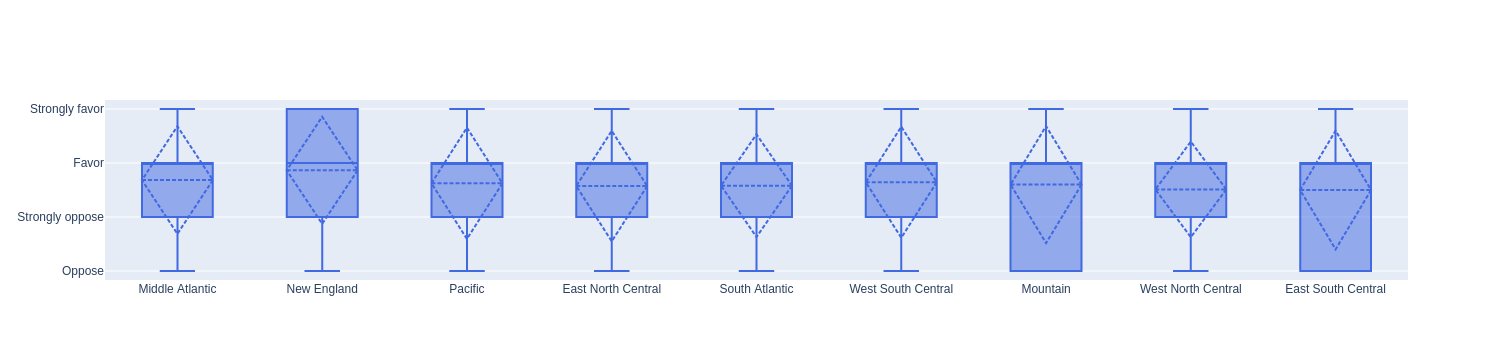

South Atlantic        200
East North Central    157
Pacific               133
Middle Atlantic        98
West South Central     87
Mountain               60
East South Central     48
West North Central     45
New England            37
Name: REGION, dtype: int64

In [74]:
# REGION

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="REGION", barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["REGION"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))#.update_yaxes(categoryorder='array', categoryarray=fav_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

df_clean_nuke["REGION"].value_counts()

In [75]:
# XNORCSIZ
# SMSA (standard metropolitan statistical area)
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="XNORCSIZ", template='plotly_dark', barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Type of living space", width=1500, height=800
)
# fig.show()

In [76]:
# POLNUKE
# Elected officials (How well elected officials know risk by nuclear power?)

'''
0) Inapplicable	1578	61.9
1) (Very well)	49	1.9
2)	90	3.5
3)	301	11.8
4)	307	12.0
5) (Not at all)	169	6.6
8) Don't know	44	1.7
9) No answer	11	0.4
'''

mean_df = mean_df_gen('POLNUKE')



for ind in df_clean_nuke.index:
    if df_clean_nuke['POLNUKE'][ind] ==  "2":
        df_clean_nuke['POLNUKE'][ind] = "Well"
    if df_clean_nuke['POLNUKE'][ind] ==  "3":
        df_clean_nuke['POLNUKE'][ind] = "Neither"
    if df_clean_nuke['POLNUKE'][ind] ==  "4":
        df_clean_nuke['POLNUKE'][ind] = "Not well"
    
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="POLNUKE", barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
    yaxis_title="Number of respondants",
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", legend_title="How well elected officials know risk by nuclear power"
)
# fig.show()

df_clean_nuke['POLNUKE'].value_counts()

fig = px.bar(mean_df, x="NUKEELEC", y="POLNUKE").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses"
)
# fig.show()


Strong Democrat                 152
Not strong Democrat             141
Independent                     138
Independent, near Democrat      122
Not strong Republican           106
Strong Republican                91
Independent, near Republican     84
Other party                      24
No answer                         7
Name: PARTYID, dtype: int64


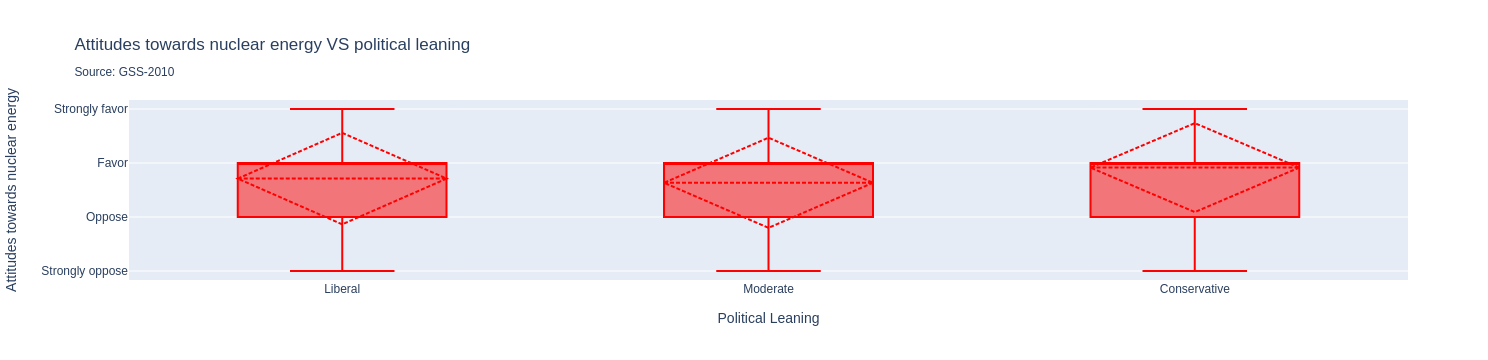

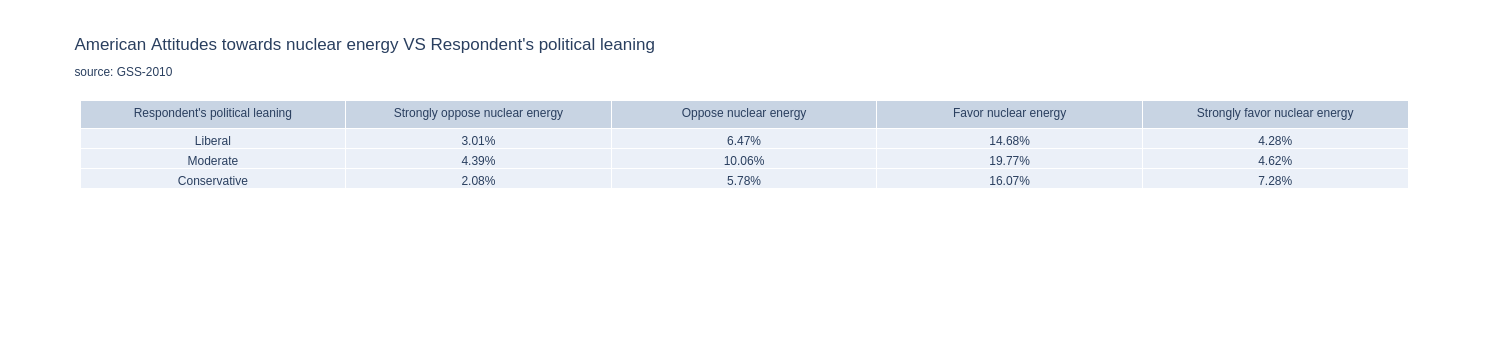

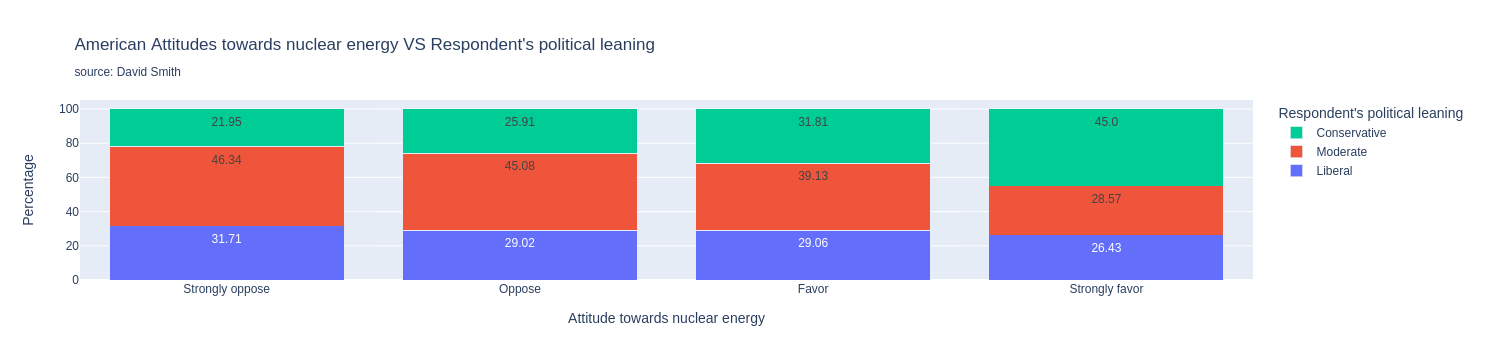

In [95]:
pol_list = ["Extremely liberal", "Liberal", "Slightly liberal", "Moderate", "Slightly conservative", "Conservative", "Extremely conservative"]
pol_list2 = ["Liberal", "Moderate", "Conservative"]

temp_df = df_clean_nuke.copy()
temp_df['POLVIEWS'] = temp_df['POLVIEWS'].map({"Extremely liberal": "Liberal", 
                                             "Liberal": "Liberal",
                                             "Slightly liberal": "Liberal",
                                             "Moderate": "Moderate",
                                             "Slightly conservative": "Conservative",
                                             "Conservative": "Conservative",
                                             "Extremely conservative": "Conservative"})

print(temp_df['PARTYID'].value_counts())
fig = go.Figure()
fig.add_trace(go.Box(
    y=temp_df["NUKEELEC"],
    x=temp_df["POLVIEWS"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=pol_list2)
fig.update_layout(yaxis_title="Attitudes towards nuclear energy", xaxis_title="Political Leaning", title_text="Attitudes towards nuclear energy VS political leaning<br><sub>Source: David Smith")
fig.show()

create_table(temp_df, "POLVIEWS", pol_list2, "Respondent's political leaning", height=200)
percentage_bar(temp_df, "POLVIEWS", pol_list2, "Respondent's political leaning")

In [78]:
# which class is the respondant in
clas_list = ["Lower class", "Working class", "Lower middle class", "Middle class", "Upper middle class", "Upper class", "No answer"]
# fig = go.Figure()
# fig.add_trace(go.Box(
#     y=df_clean_nuke["NUKEELEC"],
#     x=df_clean_nuke["CLASS1"],
#     name='Mean & SD',
#     marker_color='royalblue',
#     boxmean='sd' # represent mean and standard deviation
# )).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=clas_list)
# fig.update_layout(title_text="Support for increasing nuclear energy VS class standing", yaxis_title="Increase the use of nuclear power<br> to generate electricity in the U.S.?", xaxis_title="Class")
# fig.show()

In [79]:
# 1135) OPBRIBES
# For each of these, please tell me how important you think it is for getting ahead in life. How important is giving bribes?

bribe_list = ["Inapplicable", "Not important at all", "Not very important", "Fairly important", "Very important", "Essential"]
# fig = go.Figure()
# fig.add_trace(go.Box(
#     y=df_clean_nuke["NUKEELEC"],
#     x=df_clean_nuke["OPBRIBES"],
#     name='Mean & SD',
#     marker_color='royalblue',
#     boxmean='sd' # represent mean and standard deviation
# )).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=bribe_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
# fig.show()

In [80]:
# 1129) PAYENVIR
# How willing would you be to pay much higher prices in order to protect the environment? Would you say . . .

willing_list = ["Inapplicable", "Not willing at all", "Not very willing", "Neither willing nor unwilling", "Fairly willing", "Very willing"]
# fig = go.Figure()
# fig.add_trace(go.Box(
#     y=df_clean_nuke["NUKEELEC"],
#     x=df_clean_nuke["PAYENVIR"],
#     name='Mean & SD',
#     marker_color='royalblue',
#     boxmean='sd' # represent mean and standard deviation
# )).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=willing_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
# fig.show()

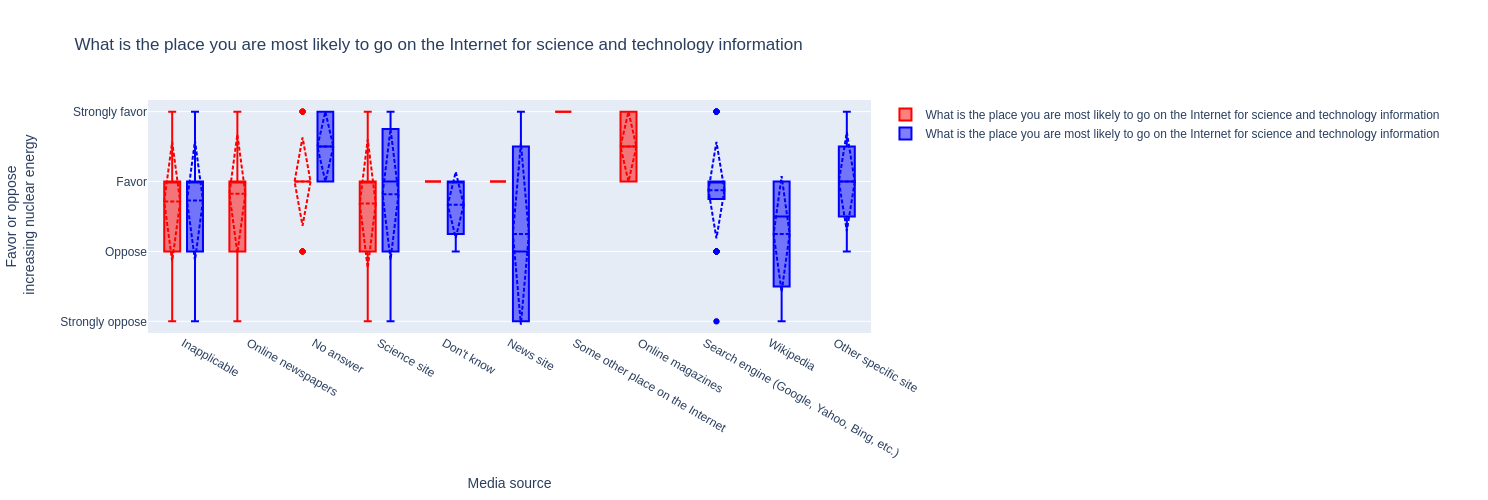

In [81]:
# 1129) PAYENVIR
# How willing would you be to pay much higher prices in order to protect the environment? Would you say . . .

# willing_list = ["Inapplicable", "Not willing at all", "Not very willing", "Neither willing nor unwilling", "Fairly willing", "Very willing"]

df_updated = df_clean_nuke.copy()
df_updated = df_updated[df_updated.NUKEELEC != 'No answer']
df_updated = df_updated[df_updated.NEWSFROM != 'No answer']
df_updated = df_updated[df_updated.SCIFROM != 'No answer']
df_updated = df_updated[df_updated.SEEKSCI != 'No answer']

df_updated = df_updated[df_updated.NEWSFROM != 'Other']
df_updated = df_updated[df_updated.SCIFROM != 'Other']

fig = go.Figure()
fig.add_trace(go.Box(
    name="News",
    y=df_updated["NUKEELEC"],
    x=df_updated["NEWSFROM"],
    #name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))

fig.add_trace(go.Box(
    name="Science information",
    y=df_updated["NUKEELEC"],
    x=df_updated["SCIFROM"],
    #name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
))
fig.add_trace(go.Box(
    name="Seeking scientific info",
    y=df_updated["NUKEELEC"],
    x=df_updated["SEEKSCI"],
    #name='Mean & SD',
    marker_color='orange',
    boxmean='sd' # represent mean and standard deviation
))

fig.update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(type = "category")
fig.update_layout(height=500, boxmode='group', xaxis_title="Media Source", yaxis_title="Favor or oppose<br> increasing nuclear energy")
# fig.show()

# Online news sources
fig = go.Figure()
fig.add_trace(go.Box(
    name="What is the place you are most likely to go on the Internet for science and technology information",
    y=df_updated["NUKEELEC"],
    x=df_updated["SCINEWS3"],
    #name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
))
fig.add_trace(go.Box(
    # SCIINFGO
    name="What is the place you are most likely to go on the Internet for science and technology information",
    y=df_updated["NUKEELEC"],
    x=df_updated["SCIINFGO"],
    #name='Mean & SD',
    marker_color='blue',
    boxmean='sd' # represent mean and standard deviation
    # SCIINFGO
))


fig.update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(type = "category")
fig.update_layout(height=500, boxmode='group', xaxis_title="Media source", 
                  title="What is the place you are most likely to go on the Internet for science and technology information", 
                  yaxis_title="Favor or oppose<br> increasing nuclear energy")
# fig.show()


In [82]:
# TOOFAST

willing_list = ["Inapplicable", "Not willing at all", "Not very willing", "Neither willing nor unwilling", "Fairly willing", "Very willing"]
# fig = go.Figure()
# fig.add_trace(go.Box(
#     y=df_clean_nuke["NUKEELEC"],
#     x=df_clean_nuke["TOOFAST"],
#     name='Mean & SD',
#     marker_color='royalblue',
#     boxmean='sd' # represent mean and standard deviation
# )).update_yaxes(categoryorder='array', categoryarray=fav_list)#.update_xaxes(categoryorder='array', categoryarray=willing_list)
# #fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
# fig.show()